Numerical Summary:
                                 Date  Premium_Amount  Claim_Amount
count                           1000     1000.000000   1000.000000
mean   2021-06-25 19:04:48.000000256      504.326900    213.609530
min              2020-01-01 00:00:00       82.590000      0.150000
25%              2020-09-21 12:00:00      406.057500     62.850000
50%              2021-07-01 12:00:00      505.285000    148.295000
75%              2022-03-30 18:00:00      596.435000    297.625000
max              2022-12-31 00:00:00      968.830000   1825.990000
std                              NaN      145.140523    209.408443

Categorical Summary:
         Policy_ID Policy_Type Policy_Status  \
count        1000        1000          1000   
unique       1000           3             3   
top     POL000001        Auto       Expired   
freq            1         347           362   

                                              Description  
count                                                1000 

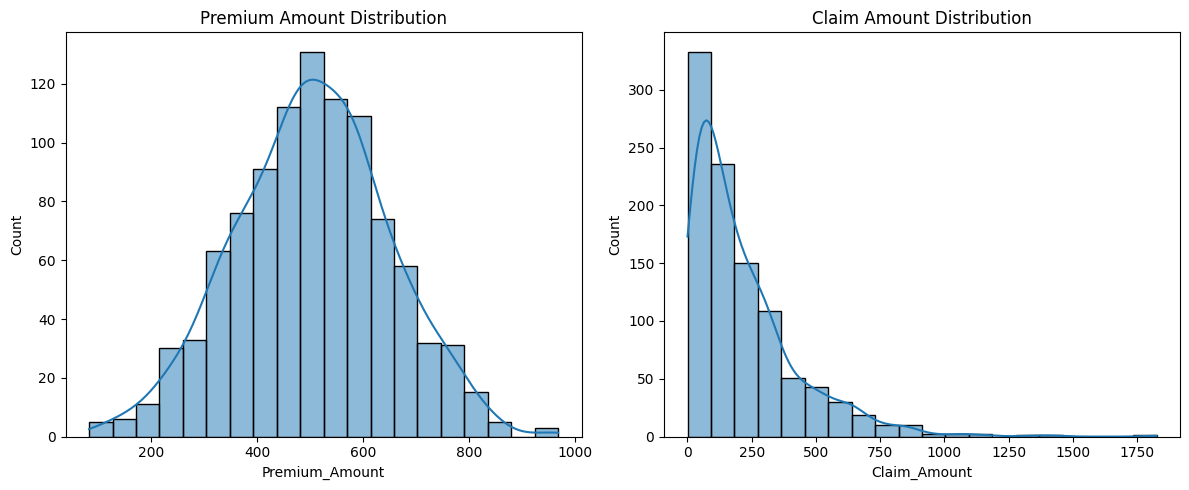

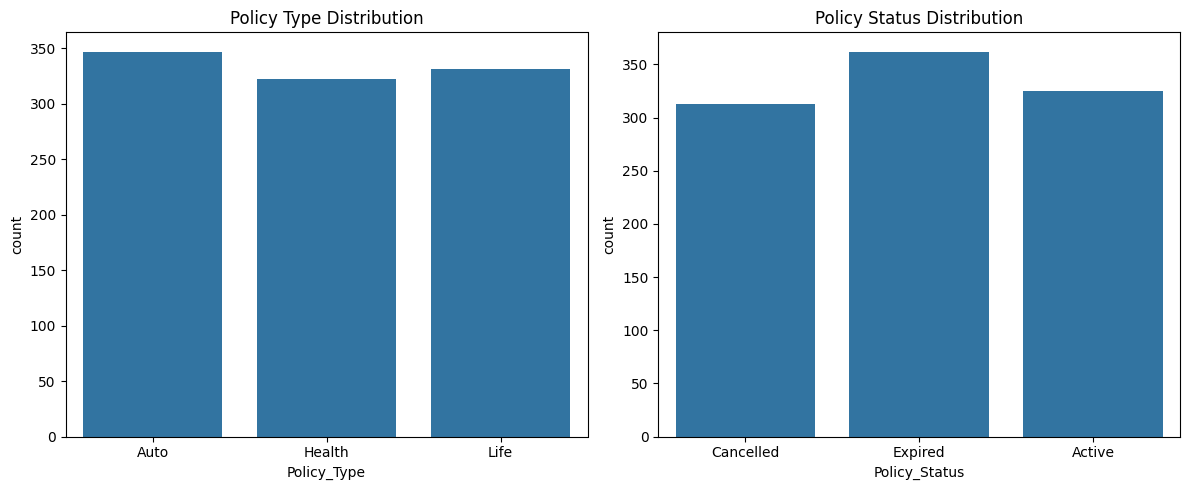

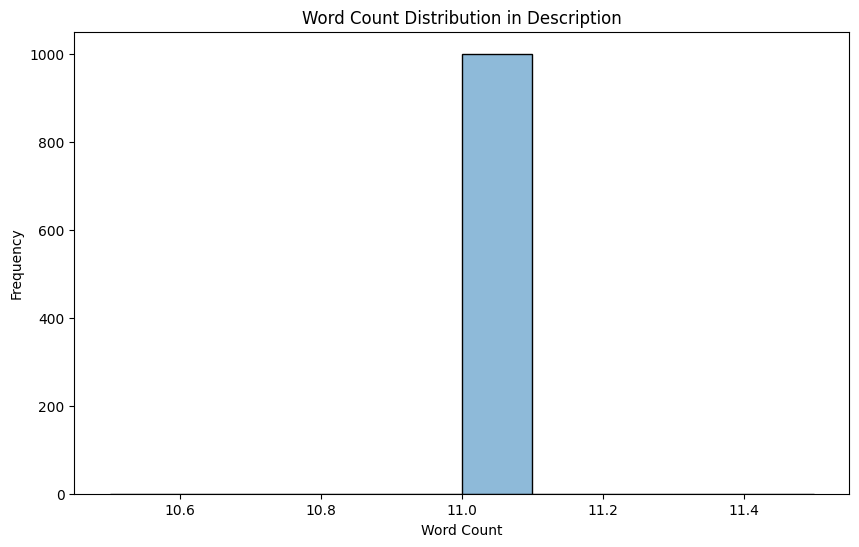

Most Common Words in Description: [('and', 1000), ('policy', 790), ('insurance', 789), ('preventive', 419), ('accidents,', 397), ('covering', 395), ('with', 394), ('for', 394), ('This', 211), ('covers', 211)]


In [1]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Parameters for synthetic data generation
num_records = 1000
start_date = datetime(2020, 1, 1)
end_date = datetime(2023, 1, 1)

# Sample descriptions for the Description column
sample_descriptions = [
    "This policy covers medical expenses, hospitalization, and certain preventive care services.",
    "Comprehensive car insurance with coverage for accidents, theft, and natural disasters.",
    "Life insurance policy with options for annuities and savings plans included.",
    "Basic health insurance policy covering doctor visits, medications, and preventive care.",
    "Auto insurance policy covering damage from accidents, third-party liability, and fire."
]

# Generate Policy IDs
policy_ids = [f'POL{str(i).zfill(6)}' for i in range(1, num_records + 1)]

# Helper function to generate random dates
def random_date(start, end):
    return start + timedelta(days=random.randint(0, (end - start).days))

# Create synthetic dataset
data = {
    'Date': [random_date(start_date, end_date) for _ in range(num_records)],
    'Policy_ID': policy_ids,
    'Policy_Type': np.random.choice(['Health', 'Auto', 'Life'], num_records),
    'Premium_Amount': np.random.normal(500, 150, num_records).round(2),
    'Claim_Amount': np.random.exponential(200, num_records).round(2),
    'Policy_Status': np.random.choice(['Active', 'Expired', 'Cancelled'], num_records),
    'Description': [random.choice(sample_descriptions) for _ in range(num_records)]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# EDA Analysis

# 1. Summary statistics for numerical and categorical columns
print("Numerical Summary:\n", df.describe())
print("\nCategorical Summary:\n", df.describe(include='object'))

# 2. Missing Values Check
print("\nMissing Values:\n", df.isnull().sum())

# 3. Distribution of Premium and Claim Amounts
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Premium_Amount'], bins=20, kde=True)
plt.title('Premium Amount Distribution')
plt.subplot(1, 2, 2)
sns.histplot(df['Claim_Amount'], bins=20, kde=True)
plt.title('Claim Amount Distribution')
plt.tight_layout()
plt.show()

# 4. Policy Type and Status Distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='Policy_Type', data=df)
plt.title('Policy Type Distribution')
plt.subplot(1, 2, 2)
sns.countplot(x='Policy_Status', data=df)
plt.title('Policy Status Distribution')
plt.tight_layout()
plt.show()

# 5. Word Count Analysis in the Description Column
df['Word_Count'] = df['Description'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.histplot(df['Word_Count'], bins=10, kde=True)
plt.title('Word Count Distribution in Description')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

# 6. Most Common Words in Descriptions
all_words = ' '.join(df['Description']).split()
common_words = Counter(all_words).most_common(10)
print("Most Common Words in Description:", common_words)


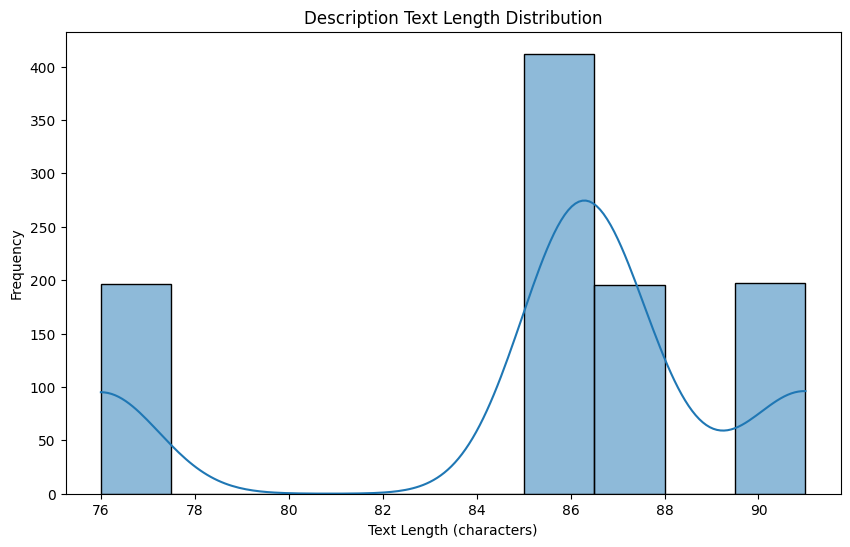

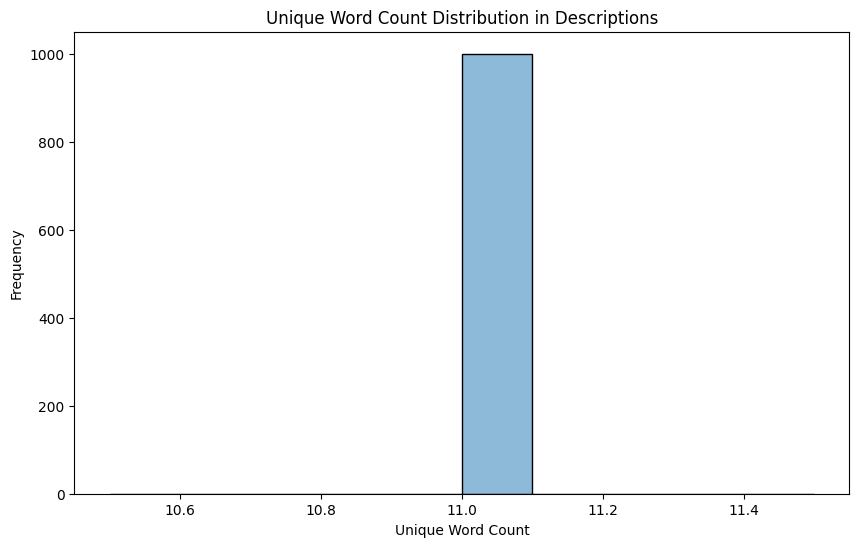

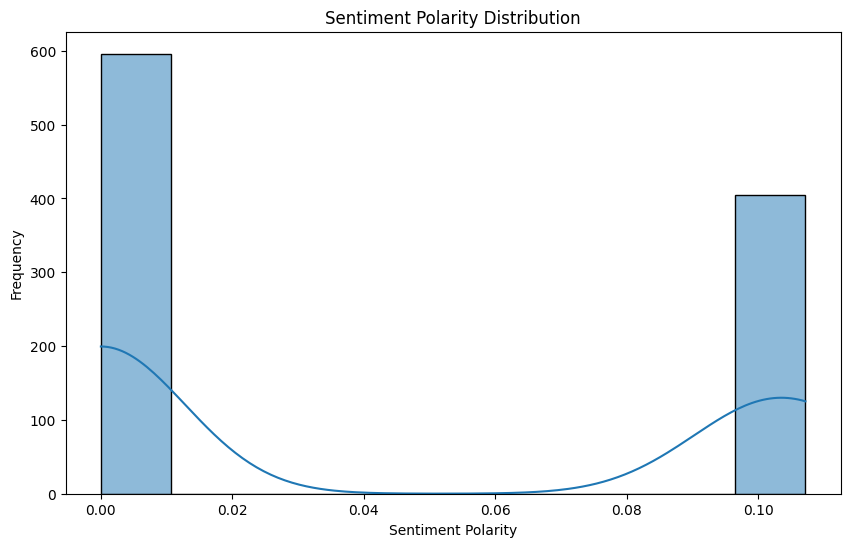

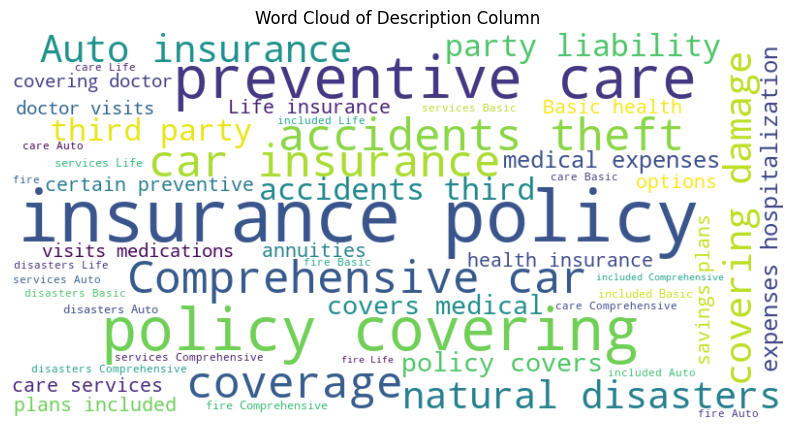

Top 10 Bigrams:
 insurance policy     596
policy covering      400
preventive care      392
accidents theft      207
car insurance        207
coverage for         207
comprehensive car    207
insurance with       207
natural disasters    207
theft and            207
dtype: int64


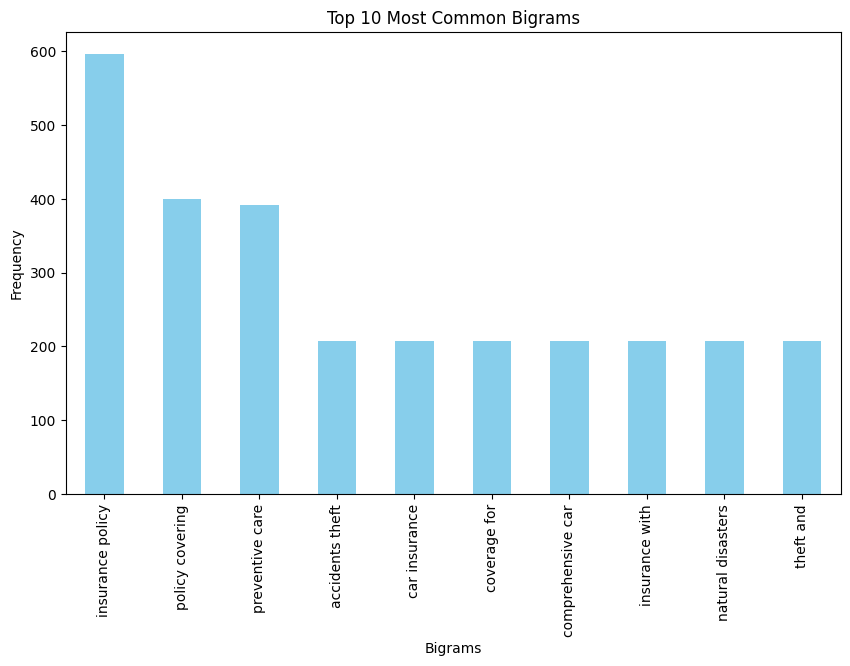

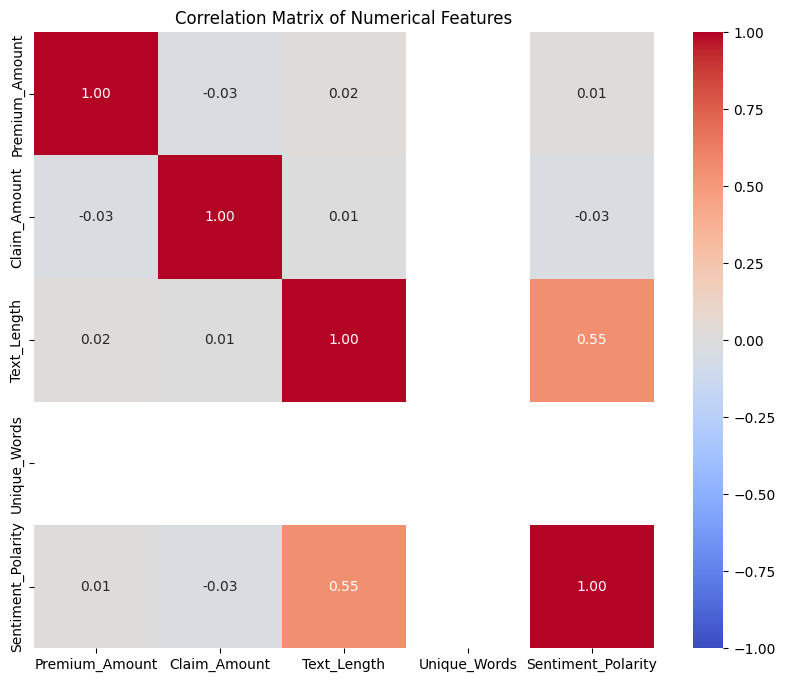

In [5]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from textblob import TextBlob

# Parameters for synthetic data generation
num_records = 1000
start_date = datetime(2020, 1, 1)
end_date = datetime(2023, 1, 1)

# Sample descriptions for the Description column
sample_descriptions = [
    "This policy covers medical expenses, hospitalization, and certain preventive care services.",
    "Comprehensive car insurance with coverage for accidents, theft, and natural disasters.",
    "Life insurance policy with options for annuities and savings plans included.",
    "Basic health insurance policy covering doctor visits, medications, and preventive care.",
    "Auto insurance policy covering damage from accidents, third-party liability, and fire."
]

# Generate Policy IDs
policy_ids = [f'POL{str(i).zfill(6)}' for i in range(1, num_records + 1)]

# Helper function to generate random dates
def random_date(start, end):
    return start + timedelta(days=random.randint(0, (end - start).days))

# Create synthetic dataset
data = {
    'Date': [random_date(start_date, end_date) for _ in range(num_records)],
    'Policy_ID': policy_ids,
    'Policy_Type': np.random.choice(['Health', 'Auto', 'Life'], num_records),
    'Premium_Amount': np.random.normal(500, 150, num_records).round(2),
    'Claim_Amount': np.random.exponential(200, num_records).round(2),
    'Policy_Status': np.random.choice(['Active', 'Expired', 'Cancelled'], num_records),
    'Description': [random.choice(sample_descriptions) for _ in range(num_records)]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# EDA on Text Column

# 1. Text Length Distribution
df['Text_Length'] = df['Description'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['Text_Length'], bins=10, kde=True)
plt.title('Description Text Length Distribution')
plt.xlabel('Text Length (characters)')
plt.ylabel('Frequency')
plt.show()

# 2. Unique Word Count
df['Unique_Words'] = df['Description'].apply(lambda x: len(set(x.split())))
plt.figure(figsize=(10, 6))
sns.histplot(df['Unique_Words'], bins=10, kde=True)
plt.title('Unique Word Count Distribution in Descriptions')
plt.xlabel('Unique Word Count')
plt.ylabel('Frequency')
plt.show()

# 3. Sentiment Analysis (Polarity)
df['Sentiment_Polarity'] = df['Description'].apply(lambda x: TextBlob(x).sentiment.polarity)
plt.figure(figsize=(10, 6))
sns.histplot(df['Sentiment_Polarity'], bins=10, kde=True)
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

# 4. Word Cloud
all_text = ' '.join(df['Description'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Description Column')
plt.show()

# 5. Bigram Analysis
from sklearn.feature_extraction.text import CountVectorizer

# Create bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2))
bigrams = vectorizer.fit_transform(df['Description'])
bigram_counts = pd.DataFrame(bigrams.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False)

# Display top 10 bigrams
print("Top 10 Bigrams:\n", bigram_counts.head(10))

# Plot top 10 bigrams
plt.figure(figsize=(10, 6))
bigram_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Common Bigrams')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.show()

# 6. Correlation Matrix
# Select only numeric columns for correlation
numeric_columns = ['Premium_Amount', 'Claim_Amount', 'Text_Length', 'Unique_Words', 'Sentiment_Polarity']
correlation_matrix = df[numeric_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [4]:
!pip install textblob

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   ----- ---------------------------------- 92.2/626.3 kB 1.3 MB/s eta 0:00:01
   -------------------------------- ------- 512.0/626.3 kB 5.3 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 4.9 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Numerical Summary:
                              Date  Premium_Amount  Claim_Amount
count                        1000     1000.000000   1000.000000
mean   2021-07-01 18:41:45.600000      508.177050    193.023560
min           2020-01-01 00:00:00       51.380000      0.200000
25%           2020-09-24 18:00:00      406.140000     53.497500
50%           2021-07-06 00:00:00      506.855000    132.660000
75%           2022-04-04 00:00:00      608.967500    278.375000
max           2022-12-31 00:00:00     1030.020000   1290.530000
std                           NaN      148.991363    187.419845

Categorical Summary:
         Policy_ID Policy_Type Policy_Status  \
count        1000        1000          1000   
unique       1000           3             3   
top     POL000001        Life     Cancelled   
freq            1         351           344   

                                              Description  
count                                                1000  
unique                   

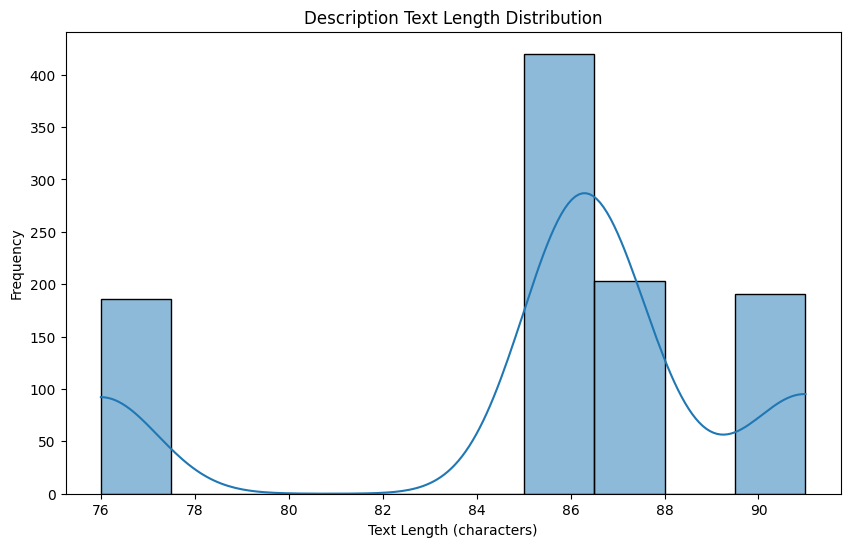

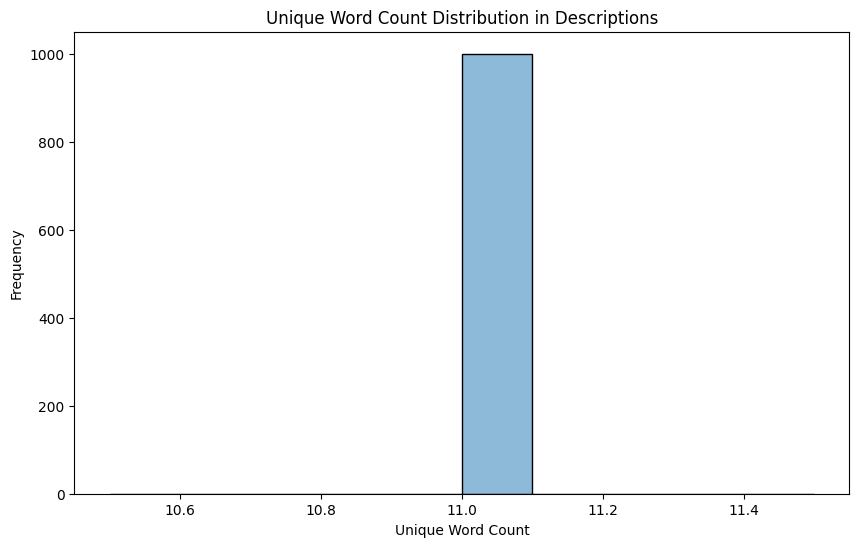

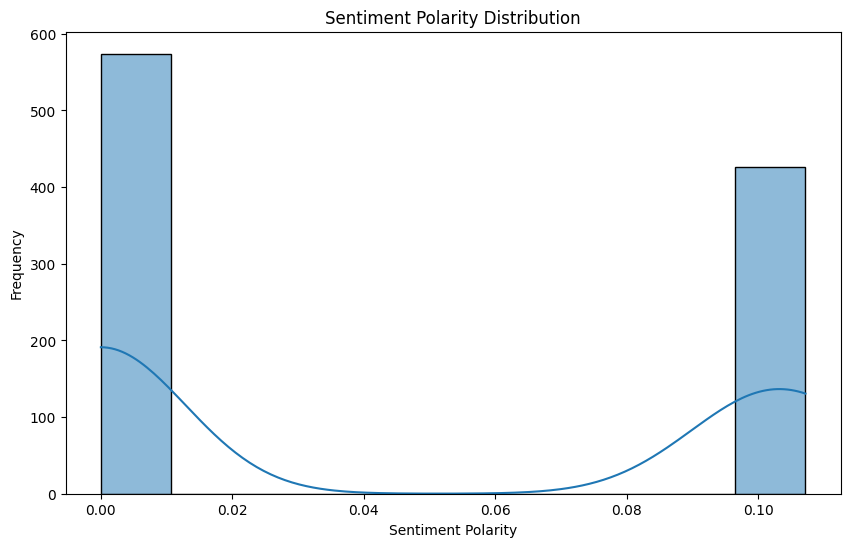

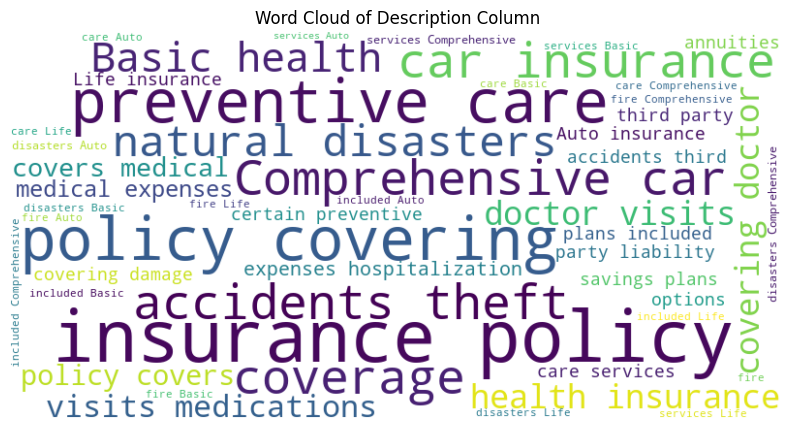

Top 10 Bigrams:
 insurance policy     574
preventive care      394
policy covering      388
accidents theft      235
car insurance        235
insurance with       235
for accidents        235
coverage for         235
comprehensive car    235
natural disasters    235
dtype: int64


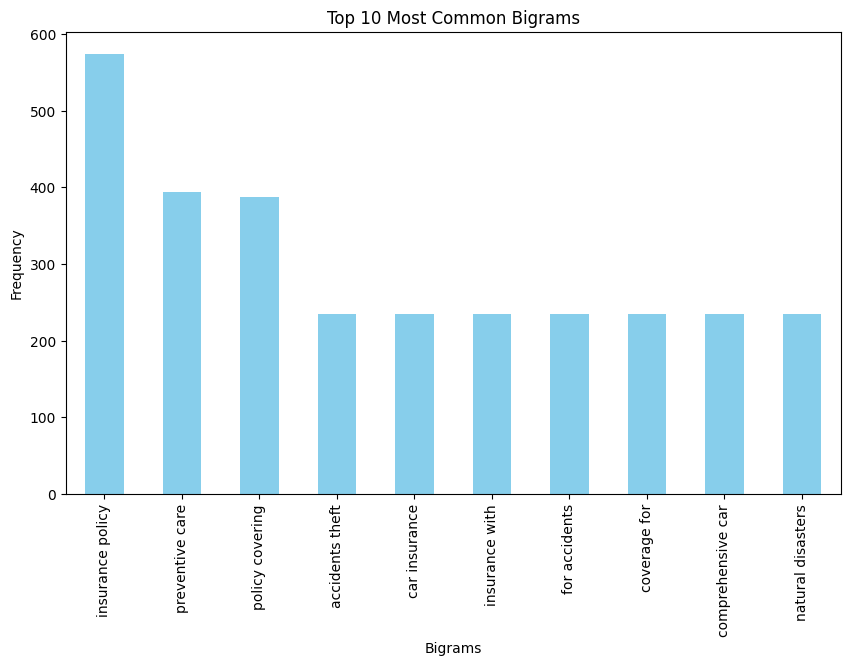

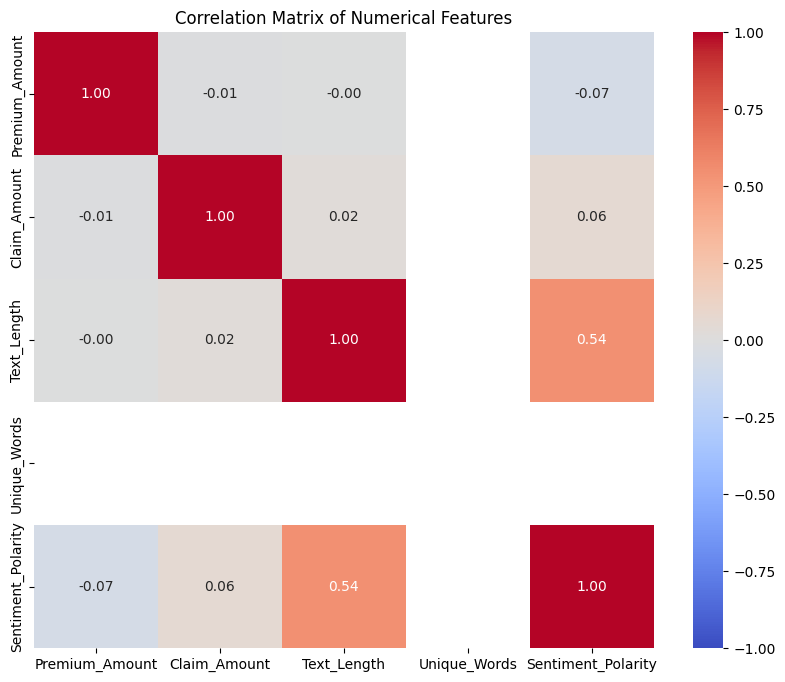

In [6]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer

# Parameters for synthetic data generation
num_records = 1000
start_date = datetime(2020, 1, 1)
end_date = datetime(2023, 1, 1)

# Sample descriptions for the Description column
sample_descriptions = [
    "This policy covers medical expenses, hospitalization, and certain preventive care services.",
    "Comprehensive car insurance with coverage for accidents, theft, and natural disasters.",
    "Life insurance policy with options for annuities and savings plans included.",
    "Basic health insurance policy covering doctor visits, medications, and preventive care.",
    "Auto insurance policy covering damage from accidents, third-party liability, and fire."
]

# Helper functions

# Function to generate random dates
def random_date(start, end):
    return start + timedelta(days=random.randint(0, (end - start).days))

# Function to create synthetic dataset
def create_insurance_data(num_records):
    policy_ids = [f'POL{str(i).zfill(6)}' for i in range(1, num_records + 1)]
    data = {
        'Date': [random_date(start_date, end_date) for _ in range(num_records)],
        'Policy_ID': policy_ids,
        'Policy_Type': np.random.choice(['Health', 'Auto', 'Life'], num_records),
        'Premium_Amount': np.random.normal(500, 150, num_records).round(2),
        'Claim_Amount': np.random.exponential(200, num_records).round(2),
        'Policy_Status': np.random.choice(['Active', 'Expired', 'Cancelled'], num_records),
        'Description': [random.choice(sample_descriptions) for _ in range(num_records)]
    }
    return pd.DataFrame(data)

# Function to perform EDA
def perform_eda(df):
    # 1. Summary statistics
    print("Numerical Summary:\n", df.describe())
    print("\nCategorical Summary:\n", df.describe(include='object'))

    # 2. Check for missing values
    print("\nMissing Values:\n", df.isnull().sum())

    # 3. Text Length Distribution
    df['Text_Length'] = df['Description'].apply(len)
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Text_Length'], bins=10, kde=True)
    plt.title('Description Text Length Distribution')
    plt.xlabel('Text Length (characters)')
    plt.ylabel('Frequency')
    plt.show()

    # 4. Unique Word Count
    df['Unique_Words'] = df['Description'].apply(lambda x: len(set(x.split())))
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Unique_Words'], bins=10, kde=True)
    plt.title('Unique Word Count Distribution in Descriptions')
    plt.xlabel('Unique Word Count')
    plt.ylabel('Frequency')
    plt.show()

    # 5. Sentiment Analysis (Polarity)
    df['Sentiment_Polarity'] = df['Description'].apply(lambda x: TextBlob(x).sentiment.polarity)
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Sentiment_Polarity'], bins=10, kde=True)
    plt.title('Sentiment Polarity Distribution')
    plt.xlabel('Sentiment Polarity')
    plt.ylabel('Frequency')
    plt.show()

    # 6. Word Cloud
    all_text = ' '.join(df['Description'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Description Column')
    plt.show()

    # 7. Bigram Analysis
    vectorizer = CountVectorizer(ngram_range=(2, 2))
    bigrams = vectorizer.fit_transform(df['Description'])
    bigram_counts = pd.DataFrame(bigrams.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False)

    # Display top 10 bigrams
    print("Top 10 Bigrams:\n", bigram_counts.head(10))

    # Plot top 10 bigrams
    plt.figure(figsize=(10, 6))
    bigram_counts.head(10).plot(kind='bar', color='skyblue')
    plt.title('Top 10 Most Common Bigrams')
    plt.xlabel('Bigrams')
    plt.ylabel('Frequency')
    plt.show()

    # 8. Correlation Matrix
    numeric_columns = ['Premium_Amount', 'Claim_Amount', 'Text_Length', 'Unique_Words', 'Sentiment_Polarity']
    correlation_matrix = df[numeric_columns].corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
    plt.title('Correlation Matrix of Numerical Features')
    plt.show()

# Main Execution
df = create_insurance_data(num_records)
perform_eda(df)


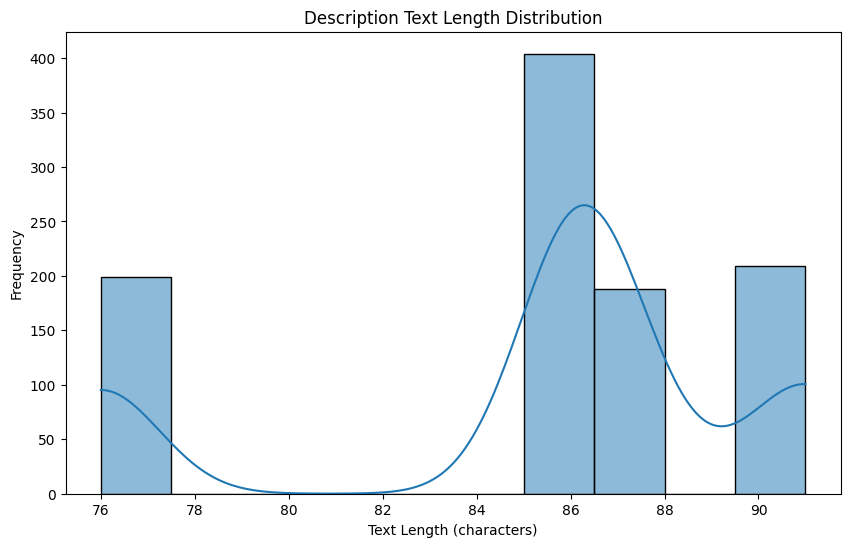

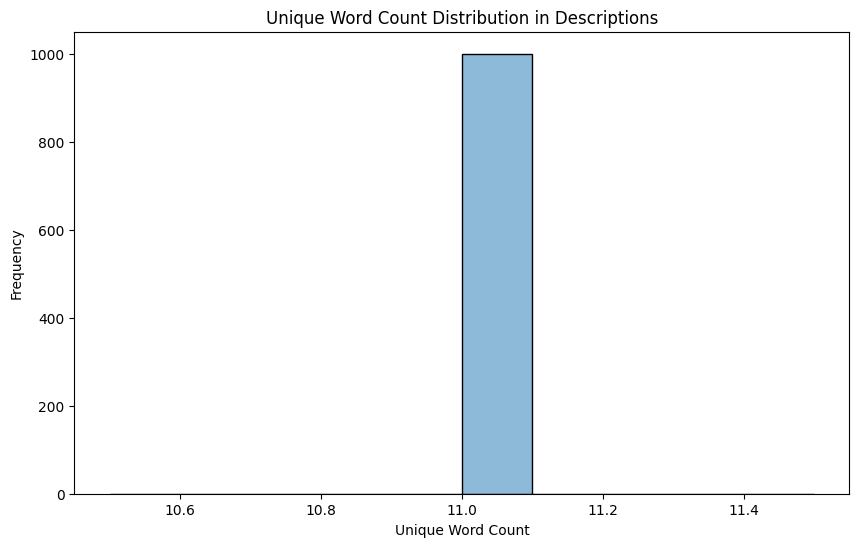

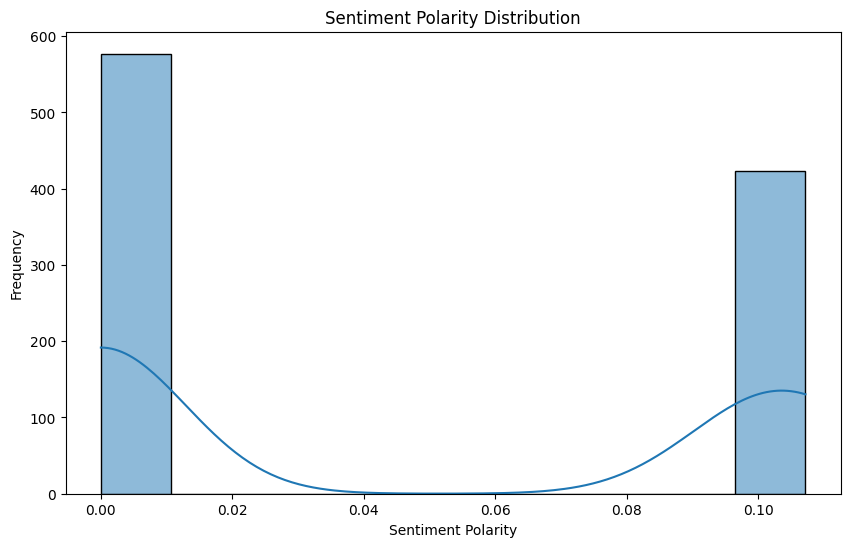

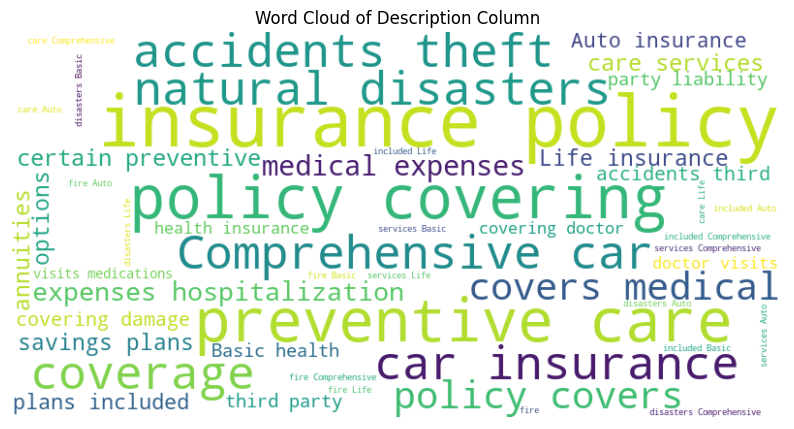

Top 10 Bigrams:
 insurance policy     577
preventive care      397
policy covering      378
natural disasters    214
for accidents        214
coverage for         214
insurance with       214
car insurance        214
accidents theft      214
comprehensive car    214
dtype: int64


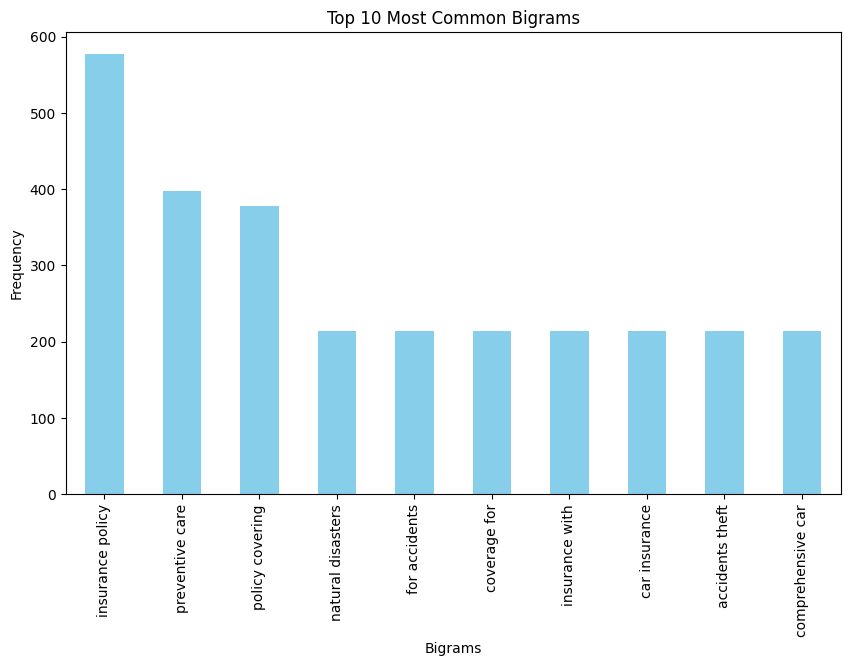

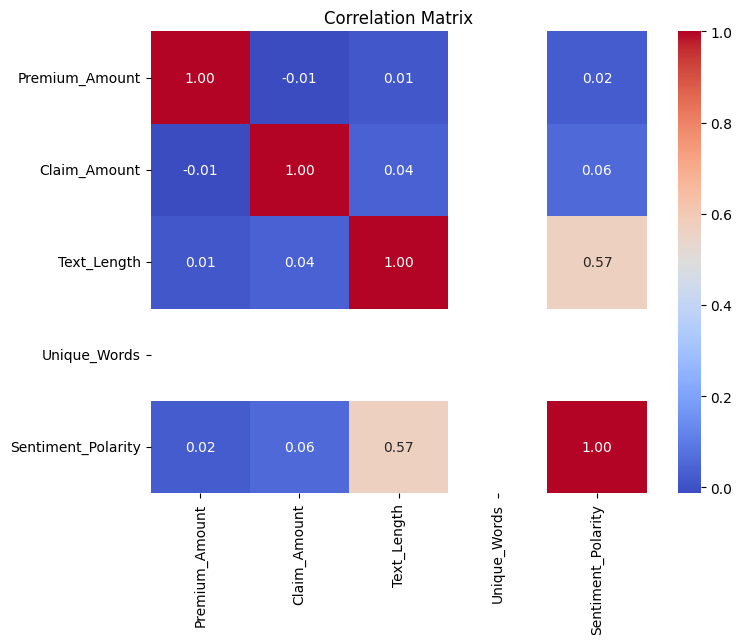

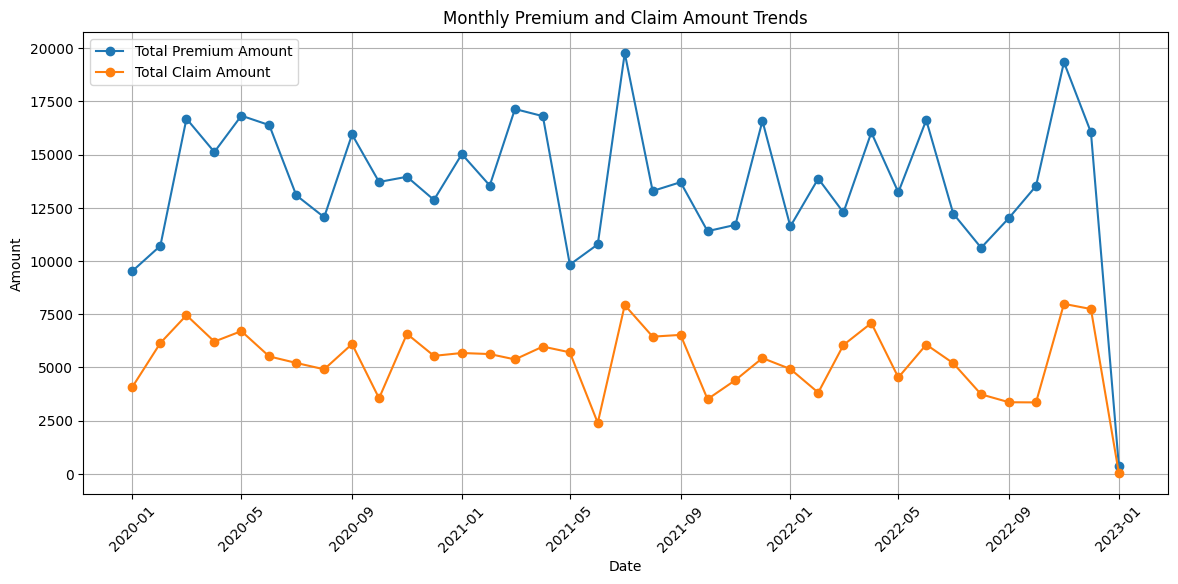

ValueError: to assemble mappings requires at least that [year, month, day] be specified: [month] is missing

In [7]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from textblob import TextBlob

# Parameters for synthetic data generation
num_records = 1000
start_date = datetime(2020, 1, 1)
end_date = datetime(2023, 1, 1)

# Sample descriptions for the Description column
sample_descriptions = [
    "This policy covers medical expenses, hospitalization, and certain preventive care services.",
    "Comprehensive car insurance with coverage for accidents, theft, and natural disasters.",
    "Life insurance policy with options for annuities and savings plans included.",
    "Basic health insurance policy covering doctor visits, medications, and preventive care.",
    "Auto insurance policy covering damage from accidents, third-party liability, and fire."
]

# Generate Policy IDs
policy_ids = [f'POL{str(i).zfill(6)}' for i in range(1, num_records + 1)]

# Helper function to generate random dates
def random_date(start, end):
    return start + timedelta(days=random.randint(0, (end - start).days))

# Create synthetic dataset
data = {
    'Date': [random_date(start_date, end_date) for _ in range(num_records)],
    'Policy_ID': policy_ids,
    'Policy_Type': np.random.choice(['Health', 'Auto', 'Life'], num_records),
    'Premium_Amount': np.random.normal(500, 150, num_records).round(2),
    'Claim_Amount': np.random.exponential(200, num_records).round(2),
    'Policy_Status': np.random.choice(['Active', 'Expired', 'Cancelled'], num_records),
    'Description': [random.choice(sample_descriptions) for _ in range(num_records)]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Create additional time-based features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter

# EDA on Text Column

# 1. Text Length Distribution
df['Text_Length'] = df['Description'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['Text_Length'], bins=10, kde=True)
plt.title('Description Text Length Distribution')
plt.xlabel('Text Length (characters)')
plt.ylabel('Frequency')
plt.show()

# 2. Unique Word Count
df['Unique_Words'] = df['Description'].apply(lambda x: len(set(x.split())))
plt.figure(figsize=(10, 6))
sns.histplot(df['Unique_Words'], bins=10, kde=True)
plt.title('Unique Word Count Distribution in Descriptions')
plt.xlabel('Unique Word Count')
plt.ylabel('Frequency')
plt.show()

# 3. Sentiment Analysis (Polarity)
df['Sentiment_Polarity'] = df['Description'].apply(lambda x: TextBlob(x).sentiment.polarity)
plt.figure(figsize=(10, 6))
sns.histplot(df['Sentiment_Polarity'], bins=10, kde=True)
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

# 4. Word Cloud
all_text = ' '.join(df['Description'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Description Column')
plt.show()

# 5. Bigram Analysis
from sklearn.feature_extraction.text import CountVectorizer

# Create bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2))
bigrams = vectorizer.fit_transform(df['Description'])
bigram_counts = pd.DataFrame(bigrams.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False)

# Display top 10 bigrams
print("Top 10 Bigrams:\n", bigram_counts.head(10))

# Plot top 10 bigrams
plt.figure(figsize=(10, 6))
bigram_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Common Bigrams')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.show()

# Correlation Analysis
correlation_matrix = df[['Premium_Amount', 'Claim_Amount', 'Text_Length', 'Unique_Words', 'Sentiment_Polarity']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Time Series Analysis: Monthly trends
monthly_data = df.groupby(['Year', 'Month'])[['Premium_Amount', 'Claim_Amount']].sum().reset_index()
monthly_data['Date'] = pd.to_datetime(monthly_data[['Year', 'Month']].assign(DAY=1))

plt.figure(figsize=(14, 6))
plt.plot(monthly_data['Date'], monthly_data['Premium_Amount'], label='Total Premium Amount', marker='o')
plt.plot(monthly_data['Date'], monthly_data['Claim_Amount'], label='Total Claim Amount', marker='o')
plt.title('Monthly Premium and Claim Amount Trends')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

# Time Series Analysis: Quarterly trends
quarterly_data = df.groupby(['Year', 'Quarter'])[['Premium_Amount', 'Claim_Amount']].sum().reset_index()
quarterly_data['Date'] = pd.to_datetime(quarterly_data[['Year', 'Quarter']].assign(DAY=1))

plt.figure(figsize=(14, 6))
plt.plot(quarterly_data['Date'], quarterly_data['Premium_Amount'], label='Total Premium Amount', marker='o')
plt.plot(quarterly_data['Date'], quarterly_data['Claim_Amount'], label='Total Claim Amount', marker='o')
plt.title('Quarterly Premium and Claim Amount Trends')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


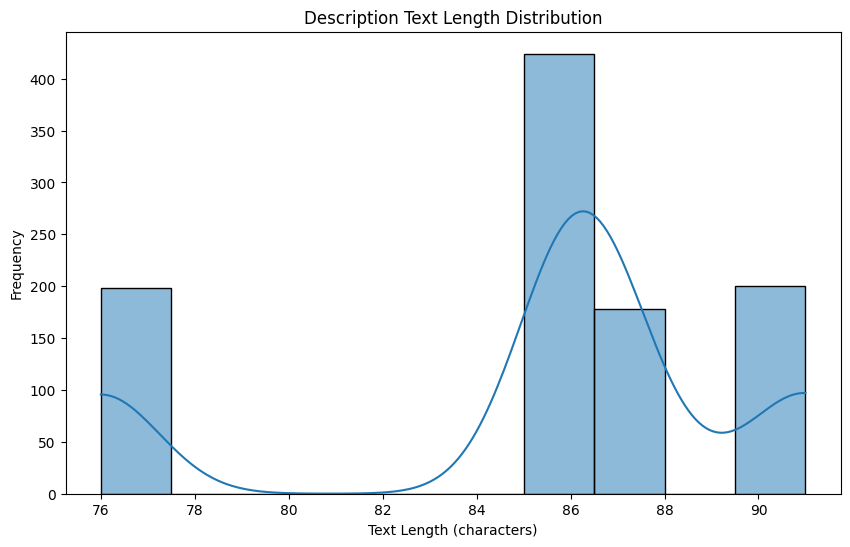

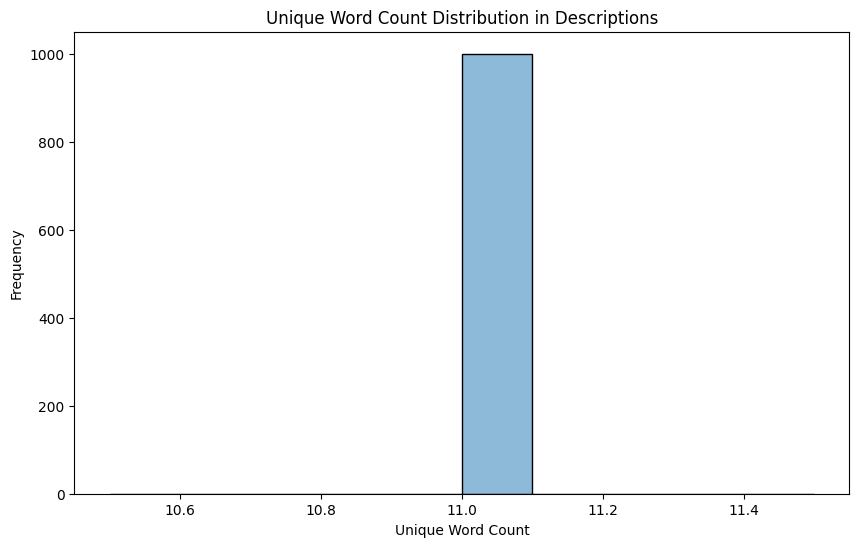

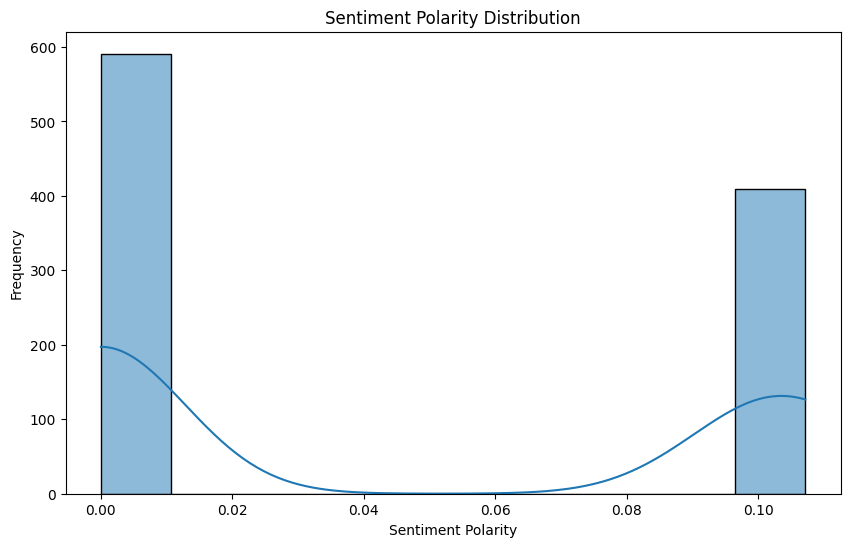

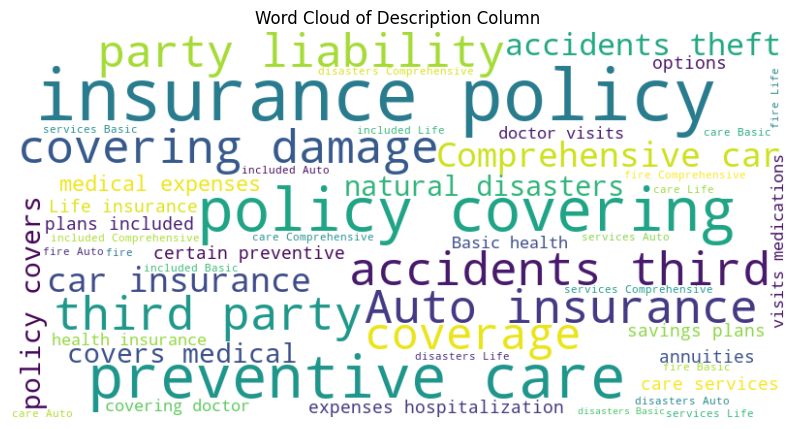

Top 10 Bigrams:
 insurance policy    591
policy covering     393
preventive care     378
from accidents      215
party liability     215
covering damage     215
accidents third     215
liability and       215
auto insurance      215
damage from         215
dtype: int64


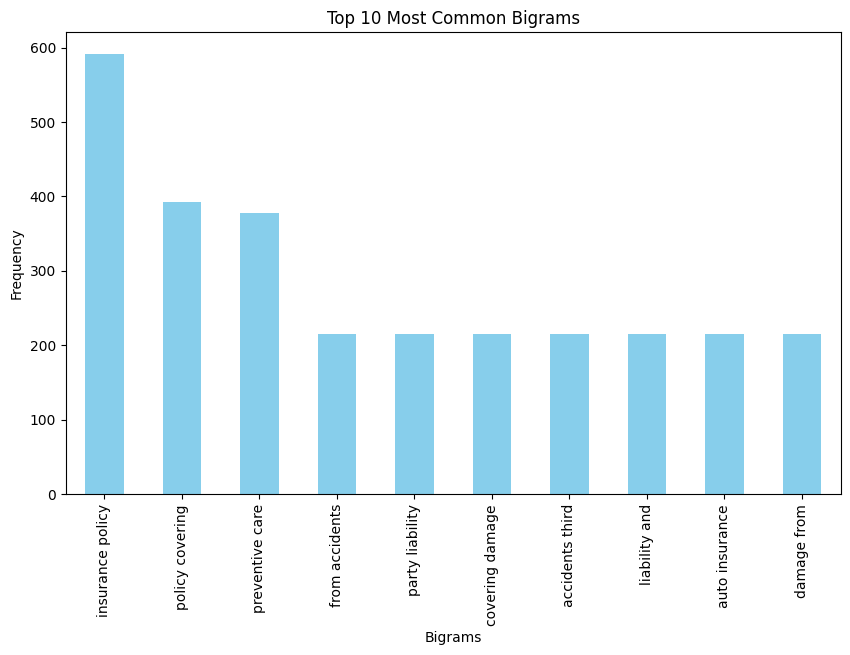

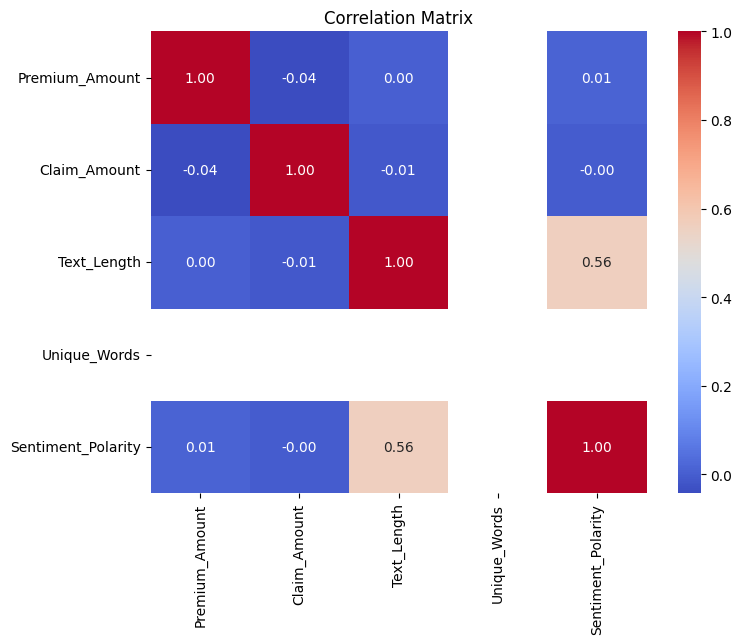

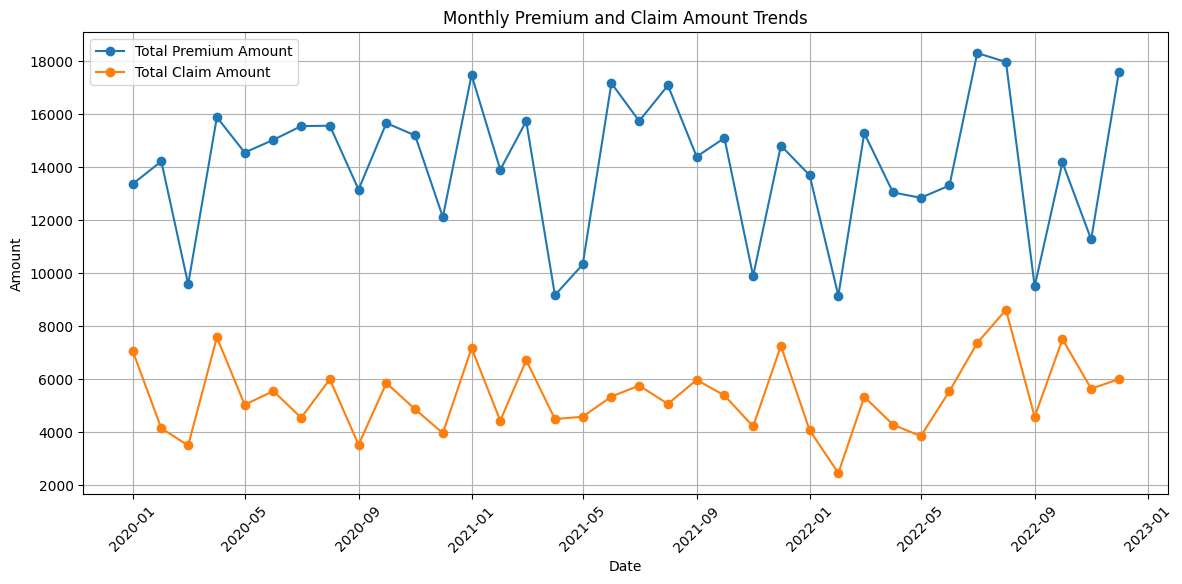

ValueError: to assemble mappings requires at least that [year, month, day] be specified: [month] is missing

In [10]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer

# Parameters for synthetic data generation
num_records = 1000
start_date = datetime(2020, 1, 1)
end_date = datetime(2023, 1, 1)

# Sample descriptions for the Description column
sample_descriptions = [
    "This policy covers medical expenses, hospitalization, and certain preventive care services.",
    "Comprehensive car insurance with coverage for accidents, theft, and natural disasters.",
    "Life insurance policy with options for annuities and savings plans included.",
    "Basic health insurance policy covering doctor visits, medications, and preventive care.",
    "Auto insurance policy covering damage from accidents, third-party liability, and fire."
]

# Generate Policy IDs
policy_ids = [f'POL{str(i).zfill(6)}' for i in range(1, num_records + 1)]

# Helper function to generate random dates
def random_date(start, end):
    return start + timedelta(days=random.randint(0, (end - start).days))

# Create synthetic dataset
data = {
    'Date': [random_date(start_date, end_date) for _ in range(num_records)],
    'Policy_ID': policy_ids,
    'Policy_Type': np.random.choice(['Health', 'Auto', 'Life'], num_records),
    'Premium_Amount': np.random.normal(500, 150, num_records).round(2),
    'Claim_Amount': np.random.exponential(200, num_records).round(2),
    'Policy_Status': np.random.choice(['Active', 'Expired', 'Cancelled'], num_records),
    'Description': [random.choice(sample_descriptions) for _ in range(num_records)]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Create additional time-based features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter

# EDA on Text Column

# 1. Text Length Distribution
df['Text_Length'] = df['Description'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['Text_Length'], bins=10, kde=True)
plt.title('Description Text Length Distribution')
plt.xlabel('Text Length (characters)')
plt.ylabel('Frequency')
plt.show()

# 2. Unique Word Count
df['Unique_Words'] = df['Description'].apply(lambda x: len(set(x.split())))
plt.figure(figsize=(10, 6))
sns.histplot(df['Unique_Words'], bins=10, kde=True)
plt.title('Unique Word Count Distribution in Descriptions')
plt.xlabel('Unique Word Count')
plt.ylabel('Frequency')
plt.show()

# 3. Sentiment Analysis (Polarity)
df['Sentiment_Polarity'] = df['Description'].apply(lambda x: TextBlob(x).sentiment.polarity)
plt.figure(figsize=(10, 6))
sns.histplot(df['Sentiment_Polarity'], bins=10, kde=True)
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

# 4. Word Cloud
all_text = ' '.join(df['Description'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Description Column')
plt.show()

# 5. Bigram Analysis
# Create bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2))
bigrams = vectorizer.fit_transform(df['Description'])
bigram_counts = pd.DataFrame(bigrams.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False)

# Display top 10 bigrams
print("Top 10 Bigrams:\n", bigram_counts.head(10))

# Plot top 10 bigrams
plt.figure(figsize=(10, 6))
bigram_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Common Bigrams')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.show()

# Correlation Analysis
correlation_matrix = df[['Premium_Amount', 'Claim_Amount', 'Text_Length', 'Unique_Words', 'Sentiment_Polarity']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Time Series Analysis: Monthly trends
monthly_data = df.groupby(['Year', 'Month'])[['Premium_Amount', 'Claim_Amount']].sum().reset_index()
monthly_data['Date'] = pd.to_datetime(monthly_data[['Year', 'Month']].assign(DAY=1))

plt.figure(figsize=(14, 6))
plt.plot(monthly_data['Date'], monthly_data['Premium_Amount'], label='Total Premium Amount', marker='o')
plt.plot(monthly_data['Date'], monthly_data['Claim_Amount'], label='Total Claim Amount', marker='o')
plt.title('Monthly Premium and Claim Amount Trends')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

# Time Series Analysis: Quarterly trends
quarterly_data = df.groupby(['Year', 'Quarter'])[['Premium_Amount', 'Claim_Amount']].sum().reset_index()

# Map quarters to their corresponding first month
quarterly_data['First_Month'] = quarterly_data['Quarter'].map({1: 1, 2: 4, 3: 7, 4: 10})  # Jan, Apr, Jul, Oct
quarterly_data['Date'] = pd.to_datetime(quarterly_data[['Year', 'First_Month']].assign(DAY=1))

plt.figure(figsize=(14, 6))
plt.plot(quarterly_data['Date'], quarterly_data['Premium_Amount'], label='Total Premium Amount', marker='o')
plt.plot(quarterly_data['Date'], quarterly_data['Claim_Amount'], label='Total Claim Amount', marker='o')
plt.title('Quarterly Premium and Claim Amount Trends')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


In [11]:
# Time Series Analysis: Quarterly trends
quarterly_data = df.groupby(['Year', 'Quarter'])[['Premium_Amount', 'Claim_Amount']].sum().reset_index()

# Map quarters to their corresponding first month
quarterly_data['First_Month'] = quarterly_data['Quarter'].map({1: 1, 2: 4, 3: 7, 4: 10})  # Jan, Apr, Jul, Oct

# Debug: Check the contents of quarterly_data
print("Quarterly Data before creating Date:")
print(quarterly_data.head())

# Create the Date column using Year and First_Month
quarterly_data['Date'] = pd.to_datetime(quarterly_data[['Year', 'First_Month']].assign(DAY=1))

# Debug: Check the contents of quarterly_data after creating Date
print("Quarterly Data after creating Date:")
print(quarterly_data.head())

plt.figure(figsize=(14, 6))
plt.plot(quarterly_data['Date'], quarterly_data['Premium_Amount'], label='Total Premium Amount', marker='o')
plt.plot(quarterly_data['Date'], quarterly_data['Claim_Amount'], label='Total Claim Amount', marker='o')
plt.title('Quarterly Premium and Claim Amount Trends')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


Quarterly Data before creating Date:
   Year  Quarter  Premium_Amount  Claim_Amount  First_Month
0  2020        1        37155.28      14711.13            1
1  2020        2        45461.03      18152.38            4
2  2020        3        44260.65      14053.71            7
3  2020        4        42971.33      14670.28           10
4  2021        1        47109.26      18310.20            1


ValueError: to assemble mappings requires at least that [year, month, day] be specified: [month] is missing

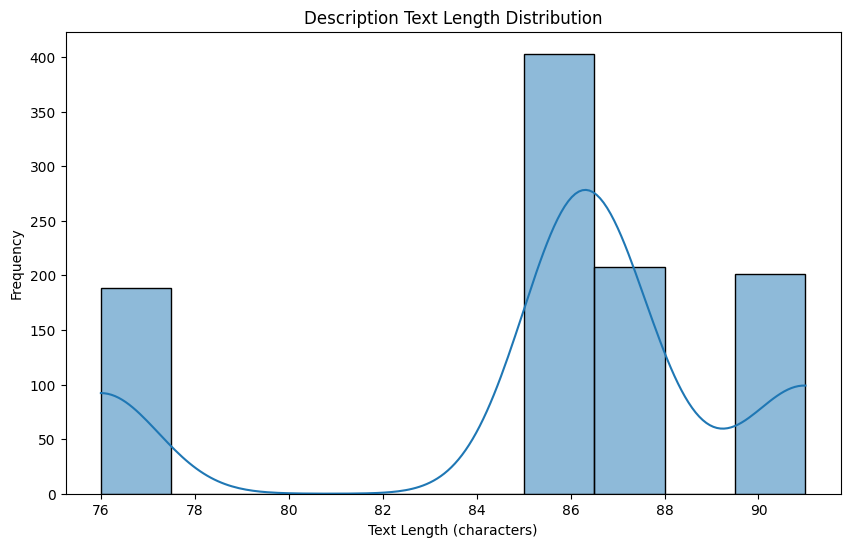

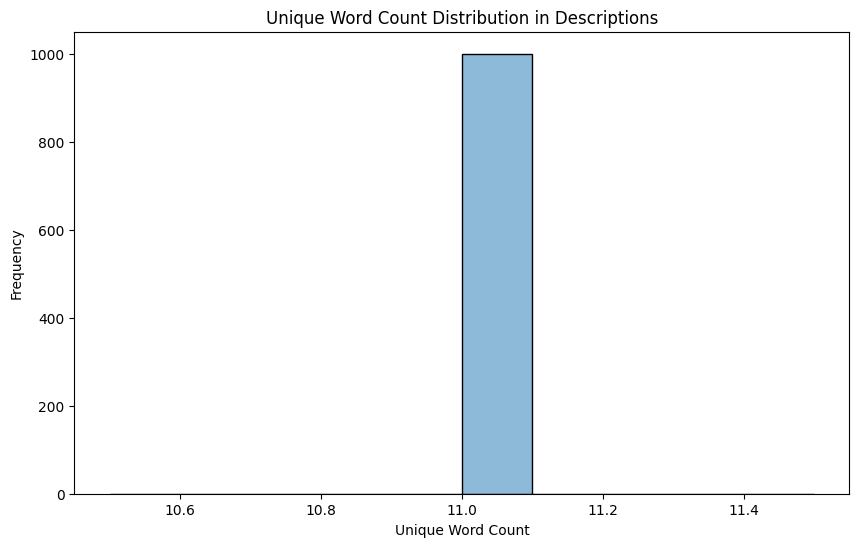

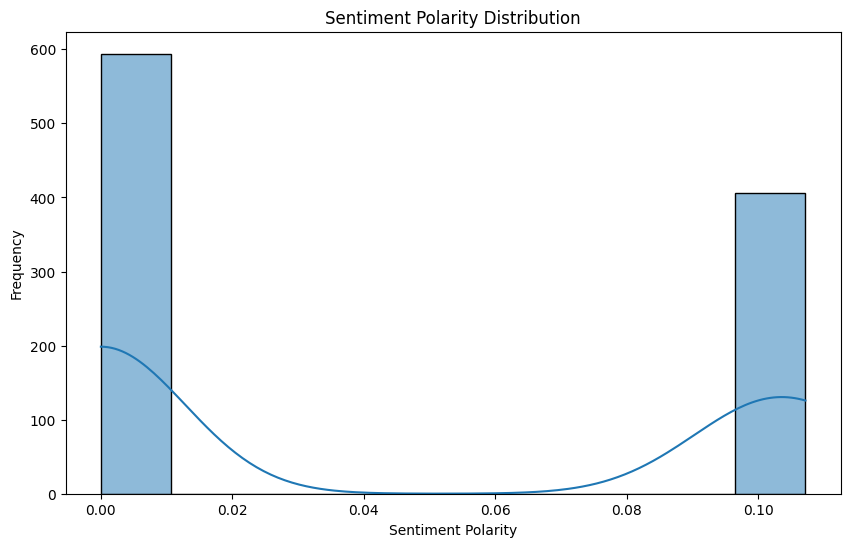

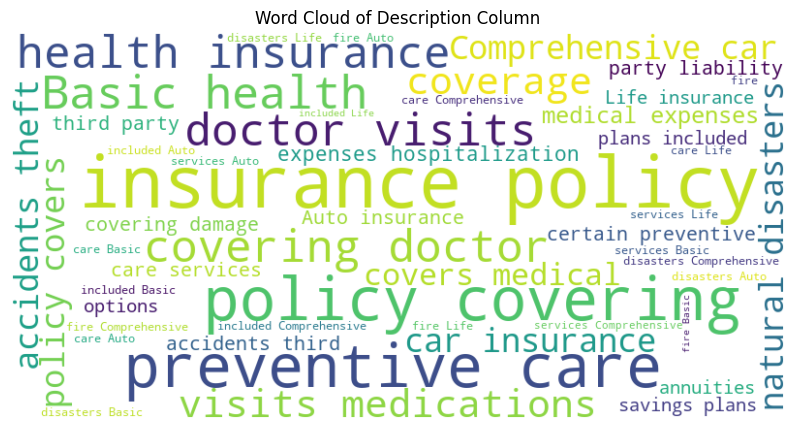

Top 10 Bigrams:
 insurance policy      594
preventive care       409
policy covering       406
medications and       208
and preventive        208
visits medications    208
health insurance      208
basic health          208
doctor visits         208
covering doctor       208
dtype: int64


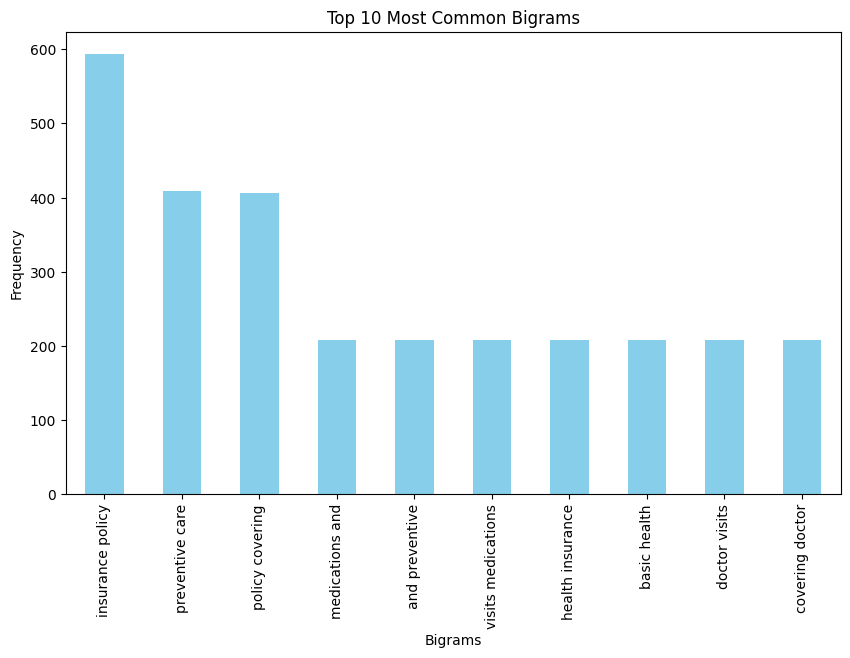

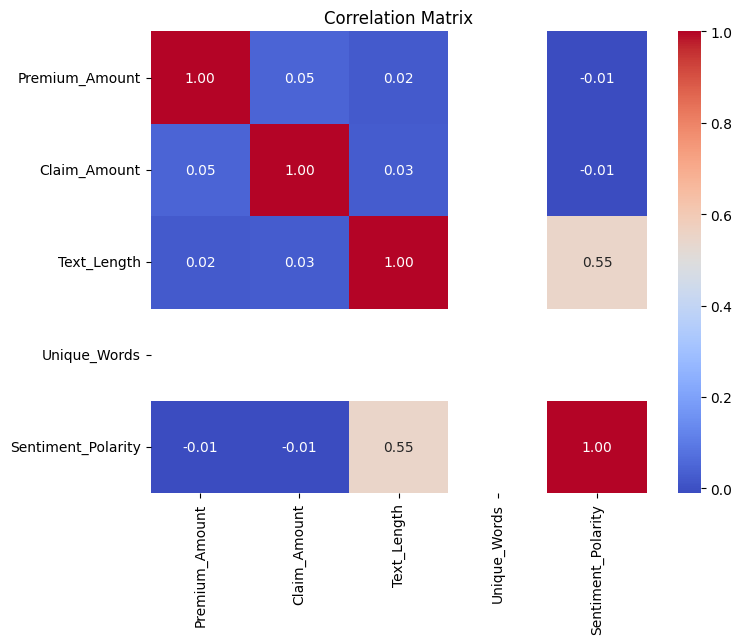

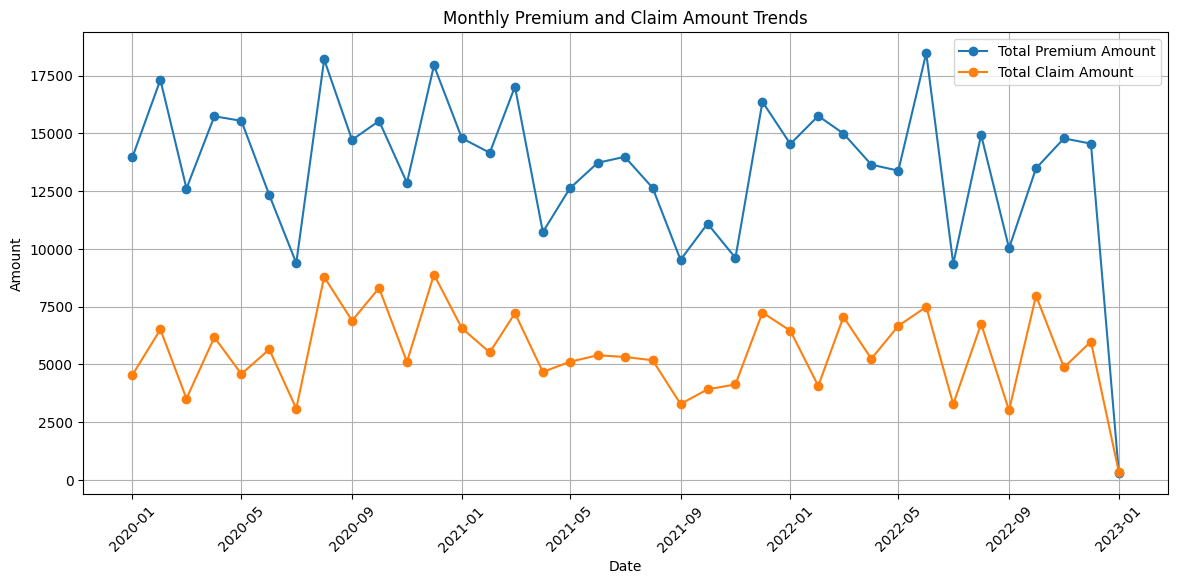

ValueError: to assemble mappings requires at least that [year, month, day] be specified: [month] is missing

In [14]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer

# Parameters for synthetic data generation
num_records = 1000
start_date = datetime(2020, 1, 1)
end_date = datetime(2023, 1, 1)

# Sample descriptions for the Description column
sample_descriptions = [
    "This policy covers medical expenses, hospitalization, and certain preventive care services.",
    "Comprehensive car insurance with coverage for accidents, theft, and natural disasters.",
    "Life insurance policy with options for annuities and savings plans included.",
    "Basic health insurance policy covering doctor visits, medications, and preventive care.",
    "Auto insurance policy covering damage from accidents, third-party liability, and fire."
]

# Generate Policy IDs
policy_ids = [f'POL{str(i).zfill(6)}' for i in range(1, num_records + 1)]

# Helper function to generate random dates
def random_date(start, end):
    return start + timedelta(days=random.randint(0, (end - start).days))

# Create synthetic dataset
data = {
    'Date': [random_date(start_date, end_date) for _ in range(num_records)],
    'Policy_ID': policy_ids,
    'Policy_Type': np.random.choice(['Health', 'Auto', 'Life'], num_records),
    'Premium_Amount': np.random.normal(500, 150, num_records).round(2),
    'Claim_Amount': np.random.exponential(200, num_records).round(2),
    'Policy_Status': np.random.choice(['Active', 'Expired', 'Cancelled'], num_records),
    'Description': [random.choice(sample_descriptions) for _ in range(num_records)]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Create additional time-based features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter

# EDA on Text Column

# 1. Text Length Distribution
df['Text_Length'] = df['Description'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['Text_Length'], bins=10, kde=True)
plt.title('Description Text Length Distribution')
plt.xlabel('Text Length (characters)')
plt.ylabel('Frequency')
plt.show()

# 2. Unique Word Count
df['Unique_Words'] = df['Description'].apply(lambda x: len(set(x.split())))
plt.figure(figsize=(10, 6))
sns.histplot(df['Unique_Words'], bins=10, kde=True)
plt.title('Unique Word Count Distribution in Descriptions')
plt.xlabel('Unique Word Count')
plt.ylabel('Frequency')
plt.show()

# 3. Sentiment Analysis (Polarity)
df['Sentiment_Polarity'] = df['Description'].apply(lambda x: TextBlob(x).sentiment.polarity)
plt.figure(figsize=(10, 6))
sns.histplot(df['Sentiment_Polarity'], bins=10, kde=True)
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

# 4. Word Cloud
all_text = ' '.join(df['Description'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Description Column')
plt.show()

# 5. Bigram Analysis
# Create bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2))
bigrams = vectorizer.fit_transform(df['Description'])
bigram_counts = pd.DataFrame(bigrams.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False)

# Display top 10 bigrams
print("Top 10 Bigrams:\n", bigram_counts.head(10))

# Plot top 10 bigrams
plt.figure(figsize=(10, 6))
bigram_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Common Bigrams')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.show()

# Correlation Analysis
correlation_matrix = df[['Premium_Amount', 'Claim_Amount', 'Text_Length', 'Unique_Words', 'Sentiment_Polarity']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Time Series Analysis: Monthly trends
monthly_data = df.groupby(['Year', 'Month'])[['Premium_Amount', 'Claim_Amount']].sum().reset_index()
monthly_data['Date'] = pd.to_datetime(monthly_data[['Year', 'Month']].assign(DAY=1))

plt.figure(figsize=(14, 6))
plt.plot(monthly_data['Date'], monthly_data['Premium_Amount'], label='Total Premium Amount', marker='o')
plt.plot(monthly_data['Date'], monthly_data['Claim_Amount'], label='Total Claim Amount', marker='o')
plt.title('Monthly Premium and Claim Amount Trends')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

# Time Series Analysis: Quarterly trends
quarterly_data = df.groupby(['Year', 'Quarter'])[['Premium_Amount', 'Claim_Amount']].sum().reset_index()

# Map quarters to their corresponding first month
quarterly_data['First_Month'] = quarterly_data['Quarter'].map({1: 1, 2: 4, 3: 7, 4: 10})  # Jan, Apr, Jul, Oct

# Create the Date column using Year and First_Month
quarterly_data['Date'] = pd.to_datetime(quarterly_data[['Year', 'First_Month']].assign(DAY=1))

plt.figure(figsize=(14, 6))
plt.plot(quarterly_data['Date'], quarterly_data['Premium_Amount'], label='Total Premium Amount', marker='o')
plt.plot(quarterly_data['Date'], quarterly_data['Claim_Amount'], label='Total Claim Amount', marker='o')
plt.title('Quarterly Premium and Claim Amount Trends')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


In [13]:


pip install pandas numpy seaborn matplotlib wordcloud textblob scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Example time series data
np.random.seed(0)
dates = pd.date_range(start="2023-01-01", periods=100, freq="D")
values = np.random.normal(loc=100, scale=10, size=100)
time_series = pd.Series(values, index=dates)


In [17]:
# Group by month and count occurrences
monthly_counts = time_series.resample("M").count()


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_11952\1089901776.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = time_series.resample("M").count()


In [18]:
# Group by month and count occurrences
monthly_counts = time_series.resample("M").count()


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_11952\1089901776.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = time_series.resample("M").count()


In [19]:
# Group by month and count occurrences
monthly_counts = time_series.resample("M").count()


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_11952\1089901776.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = time_series.resample("M").count()


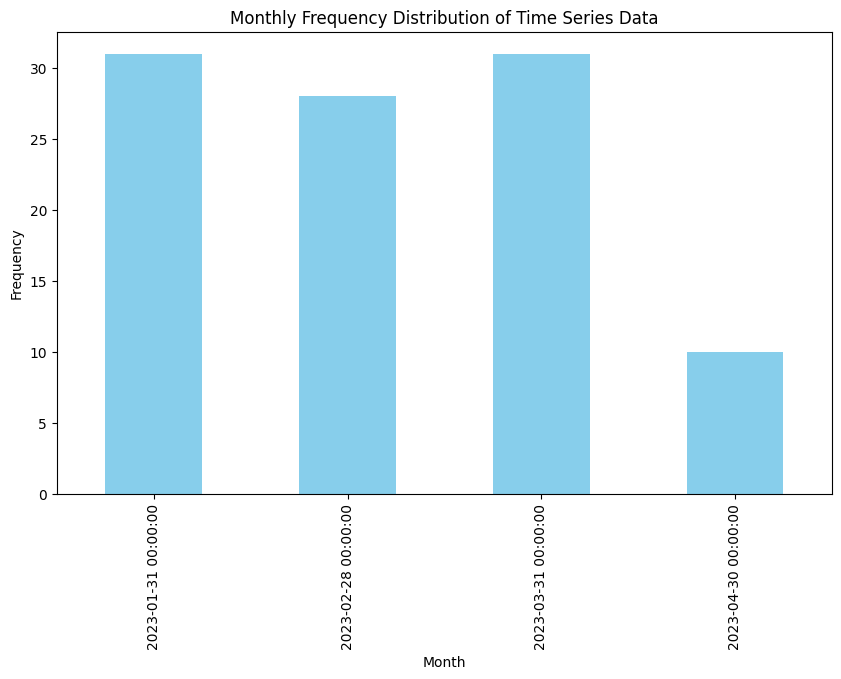

In [20]:
# Plotting
plt.figure(figsize=(10, 6))
monthly_counts.plot(kind="bar", color="skyblue")
plt.title("Monthly Frequency Distribution of Time Series Data")
plt.xlabel("Month")
plt.ylabel("Frequency")
plt.show()


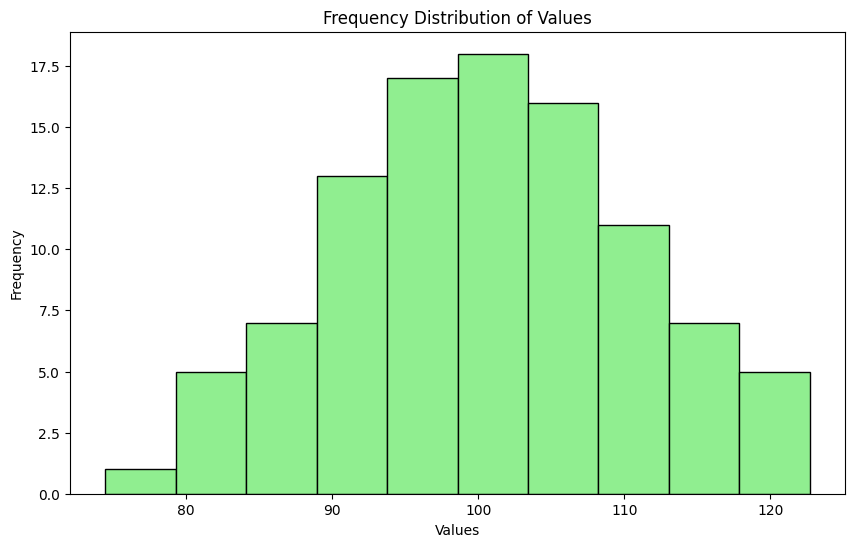

In [21]:
plt.figure(figsize=(10, 6))
time_series.plot(kind="hist", bins=10, color="lightgreen", edgecolor="black")
plt.title("Frequency Distribution of Values")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.show()


In [22]:
#ARIMA AND SARIMAX
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")


In [23]:
# Parameters for dataset generation
num_records = 1000
start_date = datetime(2020, 1, 1)
end_date = datetime(2023, 1, 1)

# Sample descriptions for the Description column
sample_descriptions = [
    "This policy covers medical expenses, hospitalization, and certain preventive care services.",
    "Comprehensive car insurance with coverage for accidents, theft, and natural disasters.",
    "Life insurance policy with options for annuities and savings plans included.",
    "Basic health insurance policy covering doctor visits, medications, and preventive care.",
    "Auto insurance policy covering damage from accidents, third-party liability, and fire."
]

# Generate Policy IDs
policy_ids = [f'POL{str(i).zfill(6)}' for i in range(1, num_records + 1)]

# Helper function to generate random dates
def random_date(start, end):
    return start + timedelta(days=random.randint(0, (end - start).days))

# Create synthetic dataset
data = {
    'Date': [random_date(start_date, end_date) for _ in range(num_records)],
    'Policy_ID': policy_ids,
    'Policy_Type': np.random.choice(['Health', 'Auto', 'Life'], num_records),
    'Premium_Amount': np.random.normal(500, 150, num_records).round(2),
    'Claim_Amount': np.random.exponential(200, num_records).round(2),
    'Policy_Status': np.random.choice(['Active', 'Expired', 'Cancelled'], num_records),
    'Description': [random.choice(sample_descriptions) for _ in range(num_records)]
}

df = pd.DataFrame(data)
df.sort_values(by='Date', inplace=True)
df.set_index('Date', inplace=True)


In [24]:
df.head()


,Policy_ID,Policy_Type,Premium_Amount,Claim_Amount,Policy_Status,Description
Date,,,,,,
2020-01-04,POL000841,Auto,592.26,55.03,Cancelled,Life insurance policy with options for annuiti...
2020-01-04,POL000958,Auto,778.63,64.50,Active,Comprehensive car insurance with coverage for ...
2020-01-04,POL000377,Life,273.71,217.93,Cancelled,"This policy covers medical expenses, hospitali..."
2020-01-04,POL000810,Auto,131.86,505.29,Expired,"This policy covers medical expenses, hospitali..."
2020-01-05,POL000187,Life,530.35,306.07,Active,Auto insurance policy covering damage from acc...


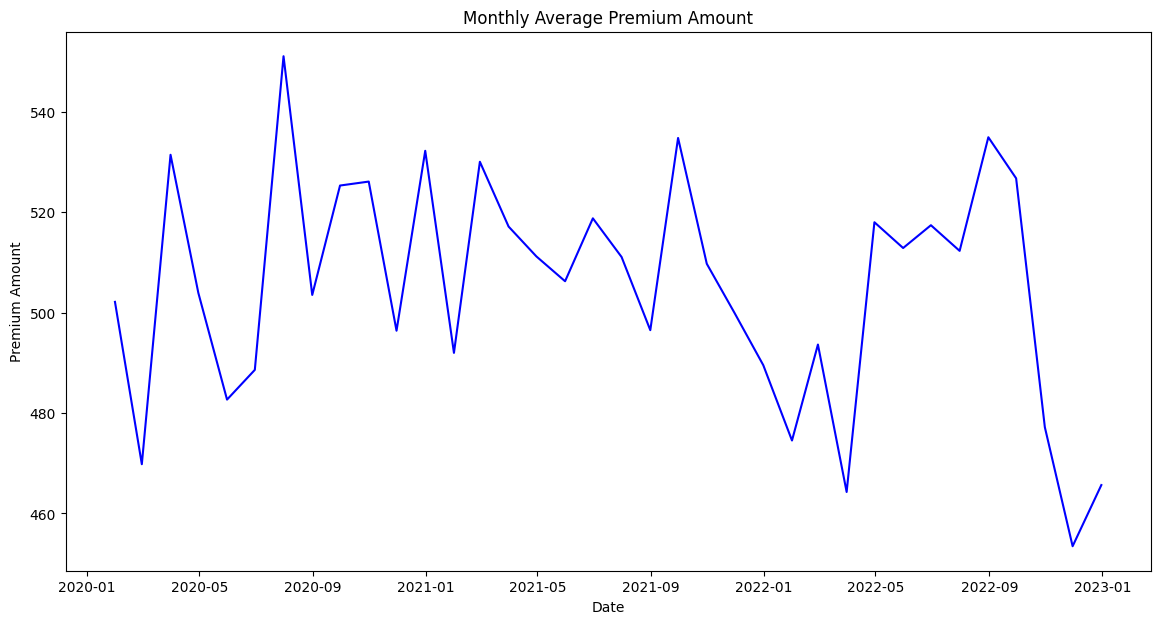

In [25]:
# Resample to monthly average premium
monthly_premium = df['Premium_Amount'].resample('M').mean()

plt.figure(figsize=(14, 7))
plt.plot(monthly_premium, color="blue")
plt.title("Monthly Average Premium Amount")
plt.xlabel("Date")
plt.ylabel("Premium Amount")
plt.show()


In [26]:
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] < 0.05:
        print("The series is stationary.")
    else:
        print("The series is non-stationary.")

adf_test(monthly_premium)


ADF Statistic: -4.539762068534049
p-value: 0.00016654670643197414
The series is stationary.


ValueError: could not broadcast input array from shape (36,) into shape (41,)

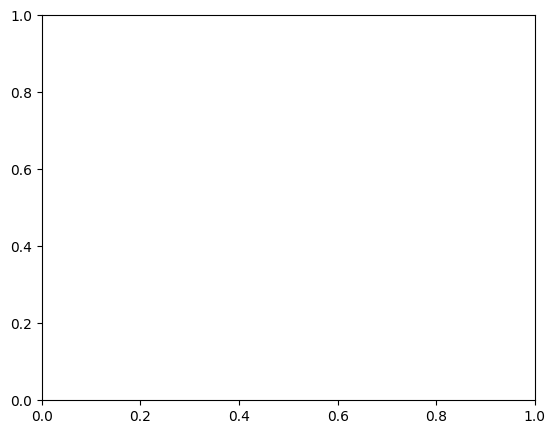

In [28]:
plt.figure(figsize=(14, 5))
plt.subplot(121)
plot_acf(monthly_premium.dropna(), ax=plt.gca(), lags=40)
plt.title("ACF Plot")

plt.subplot(122)
plot_pacf(monthly_premium.dropna(), ax=plt.gca(), lags=40)
plt.title("PACF Plot")
plt.show()

In [29]:
# Define ARIMA/SARIMA parameters
p = 1   # Based on PACF
d = 1   # Differencing for stationarity
q = 1   # Based on ACF
P = 1   # Seasonal autoregressive term
D = 1   # Seasonal differencing term
Q = 1   # Seasonal moving average term
s = 12  # Seasonality period (monthly data, so s=12)

# Fit SARIMA model
sarima_model = SARIMAX(monthly_premium, order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_result = sarima_model.fit()

# Model Summary
print(sarima_result.summary())


                                     SARIMAX Results                                      
Dep. Variable:                     Premium_Amount   No. Observations:                   36
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -110.389
Date:                            Mon, 28 Oct 2024   AIC                            230.778
Time:                                    09:35:35   BIC                            236.456
Sample:                                01-31-2020   HQIC                           232.206
                                     - 12-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1342      0.419      0.320      0.749      -0.687       0.955
ma.L1         -0.8910      0.258   

Step 6: Residual Diagnostics and Forecasting
Residual Diagnostics

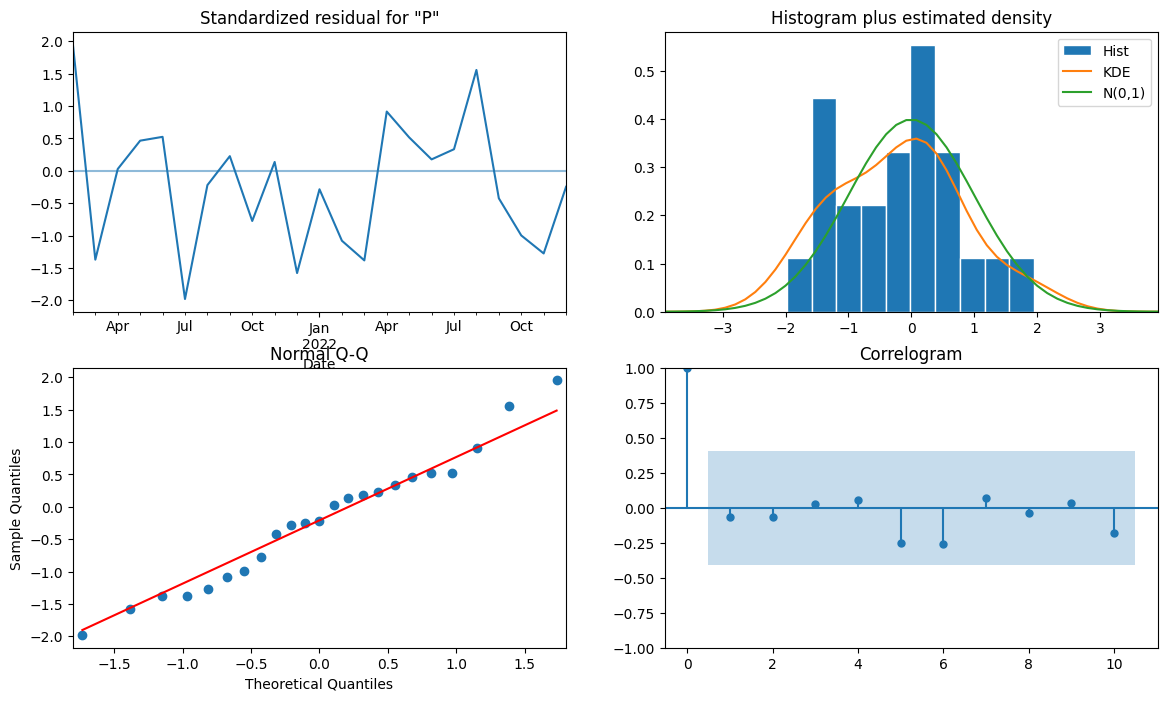

In [30]:
sarima_result.plot_diagnostics(figsize=(14, 8))
plt.show()


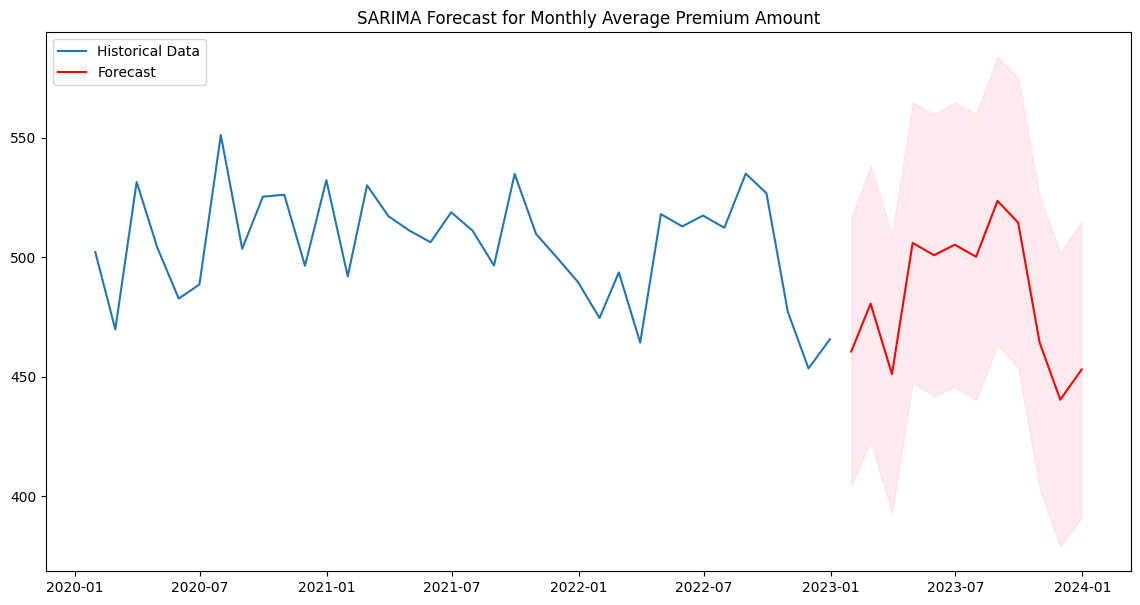

In [31]:
forecast = sarima_result.get_forecast(steps=12)
forecast_ci = forecast.conf_int()

plt.figure(figsize=(14, 7))
plt.plot(monthly_premium, label="Historical Data")
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, color="red", label="Forecast")
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color="pink", alpha=0.3)
plt.legend()
plt.title("SARIMA Forecast for Monthly Average Premium Amount")
plt.show()


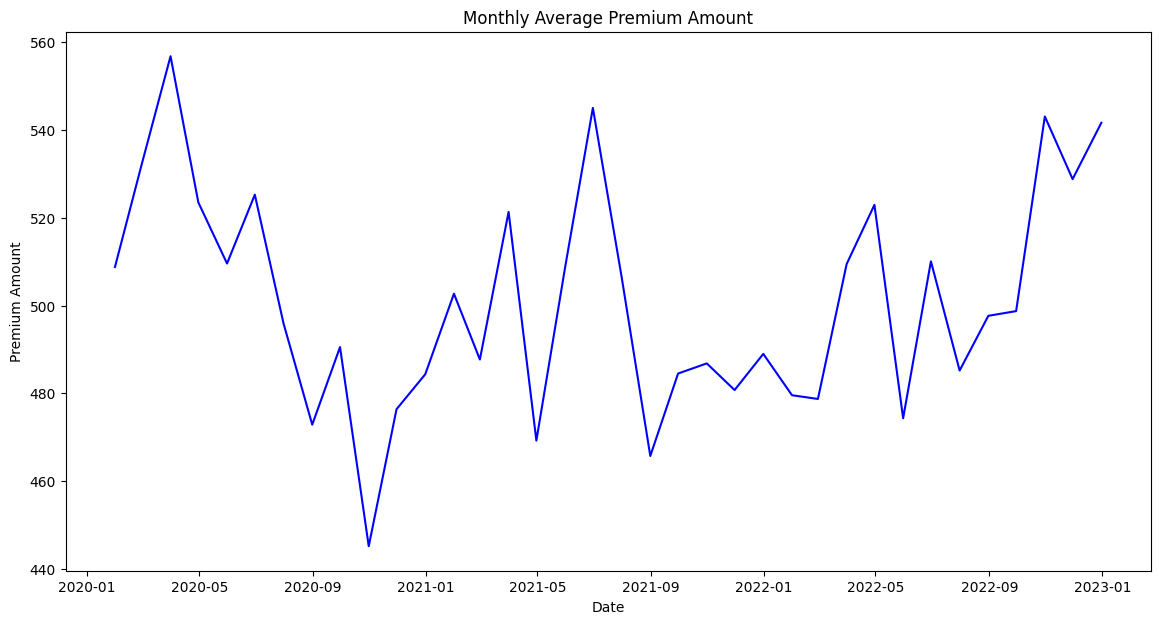

ADF Test for Monthly Premium Amount:
ADF Statistic: -3.5200297262477886
p-value: 0.00748734450789832
The series is stationary.
Length of differenced series: 35. Using lags = 34


ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 34 must be < 17.

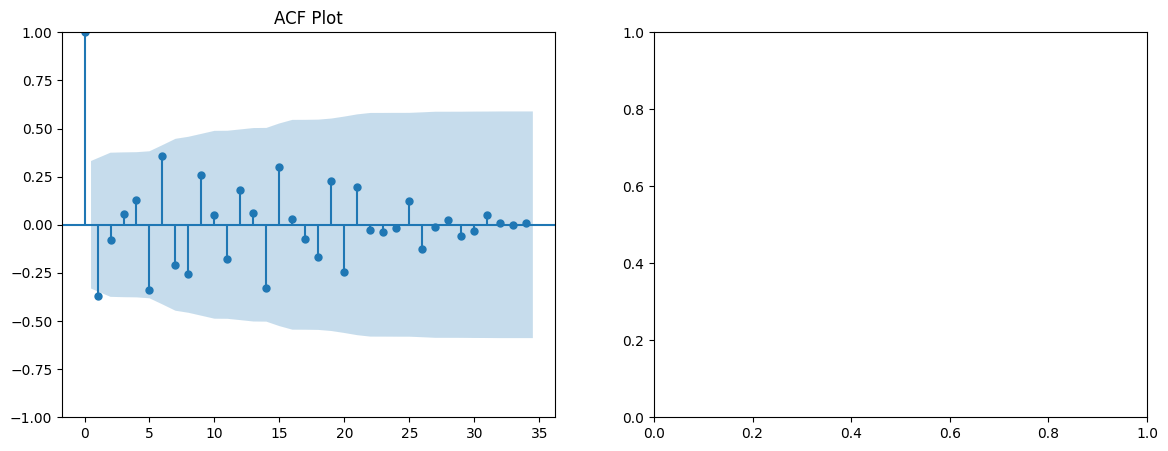

In [34]:
# Import libraries
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")

# Generate synthetic dataset
num_records = 1000
start_date = datetime(2020, 1, 1)
end_date = datetime(2023, 1, 1)

# Sample descriptions for the Description column
sample_descriptions = [
    "This policy covers medical expenses, hospitalization, and certain preventive care services.",
    "Comprehensive car insurance with coverage for accidents, theft, and natural disasters.",
    "Life insurance policy with options for annuities and savings plans included.",
    "Basic health insurance policy covering doctor visits, medications, and preventive care.",
    "Auto insurance policy covering damage from accidents, third-party liability, and fire."
]

# Generate Policy IDs
policy_ids = [f'POL{str(i).zfill(6)}' for i in range(1, num_records + 1)]

# Helper function to generate random dates
def random_date(start, end):
    return start + timedelta(days=random.randint(0, (end - start).days))

# Create synthetic dataset
data = {
    'Date': [random_date(start_date, end_date) for _ in range(num_records)],
    'Policy_ID': policy_ids,
    'Policy_Type': np.random.choice(['Health', 'Auto', 'Life'], num_records),
    'Premium_Amount': np.random.normal(500, 150, num_records).round(2),
    'Claim_Amount': np.random.exponential(200, num_records).round(2),
    'Policy_Status': np.random.choice(['Active', 'Expired', 'Cancelled'], num_records),
    'Description': [random.choice(sample_descriptions) for _ in range(num_records)]
}

df = pd.DataFrame(data)
df.sort_values(by='Date', inplace=True)
df.set_index('Date', inplace=True)

# Exploratory Data Analysis (EDA)
# Plot the monthly average Premium_Amount
monthly_premium = df['Premium_Amount'].resample('M').mean()

plt.figure(figsize=(14, 7))
plt.plot(monthly_premium, color="blue")
plt.title("Monthly Average Premium Amount")
plt.xlabel("Date")
plt.ylabel("Premium Amount")
plt.show()

# Check for stationarity with ADF test
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] < 0.05:
        print("The series is stationary.")
    else:
        print("The series is non-stationary.")

print("ADF Test for Monthly Premium Amount:")
adf_test(monthly_premium)

# Differencing the data to make it stationary (if needed)
monthly_premium_diff = monthly_premium.diff().dropna()

# Check the length of the differenced series and set a safe value for `lags`
diff_length = len(monthly_premium_diff)
safe_lags = min(40, diff_length - 1)  # Limit lags to a safe value based on data length

print(f"Length of differenced series: {diff_length}. Using lags = {safe_lags}")

# ACF and PACF plots
plt.figure(figsize=(14, 5))
plt.subplot(121)
plot_acf(monthly_premium_diff, ax=plt.gca(), lags=safe_lags)
plt.title("ACF Plot")

plt.subplot(122)
plot_pacf(monthly_premium_diff, ax=plt.gca(), lags=safe_lags)
plt.title("PACF Plot")
plt.show()

# Fit SARIMA model based on identified p, d, q values from ACF/PACF
p = 1   # Based on PACF
d = 1   # Differencing for stationarity
q = 1   # Based on ACF
P = 1   # Seasonal autoregressive term
D = 1   # Seasonal differencing term
Q = 1   # Seasonal moving average term
s = 12  # Seasonality period (monthly data, so s=12)

# Fit SARIMA model
sarima_model = SARIMAX(monthly_premium, order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_result = sarima_model.fit()

# Model Summary
print("SARIMA Model Summary:")
print(sarima_result.summary())

# Residual diagnostics
sarima_result.plot_diagnostics(figsize=(14, 8))
plt.show()

# Forecasting
forecast = sarima_result.get_forecast(steps=12)
forecast_ci = forecast.conf_int()

plt.figure(figsize=(14, 7))
plt.plot(monthly_premium, label="Historical Data")
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, color="red", label="Forecast")
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color="pink", alpha=0.3)
plt.legend()
plt.title("SARIMA Forecast for Monthly Average Premium Amount")
plt.show()
